In [2]:
import numpy as np
import math
from qiskit import QuantumCircuit, Aer, assemble, QuantumRegister, ClassicalRegister, execute
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector
from qiskit.circuit.library import MCMT
from qiskit import transpile
import matplotlib.pyplot as plt

## 2 Qubit Search

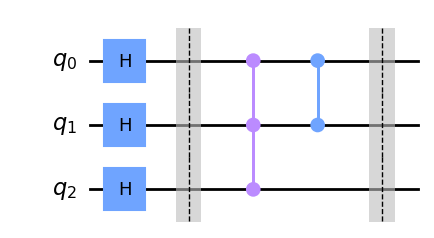

In [30]:
# qubits = QuantumRegister(3)
# result = ClassicalRegister(2)
tryit = QuantumCircuit(3)

tryit.h([0,1,2])

tryit.barrier()

# tryit.cz(0,1)
# tryit.cx(1,0)
tryit.ccz(0,1,2)
tryit.cz(0,1)

# tryit.x([1,2])
tryit.barrier()

# tryit.h(qubits)
# tryit.z(qubits)
# tryit.cz(0,1)
# tryit.h(qubits)
tryit.draw(output='mpl')

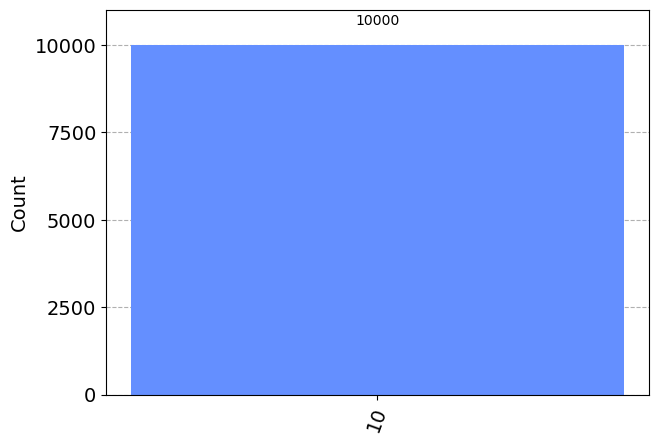

In [140]:
aer_sim = Aer.get_backend('aer_simulator')
# qobj = assemble(circuit)
t_qc = transpile(tryit, aer_sim) # sim = simulation
result = aer_sim.run(t_qc,shots=10000).result()
counts = result.get_counts()
plot_histogram(counts)

## 3 Qubit Search

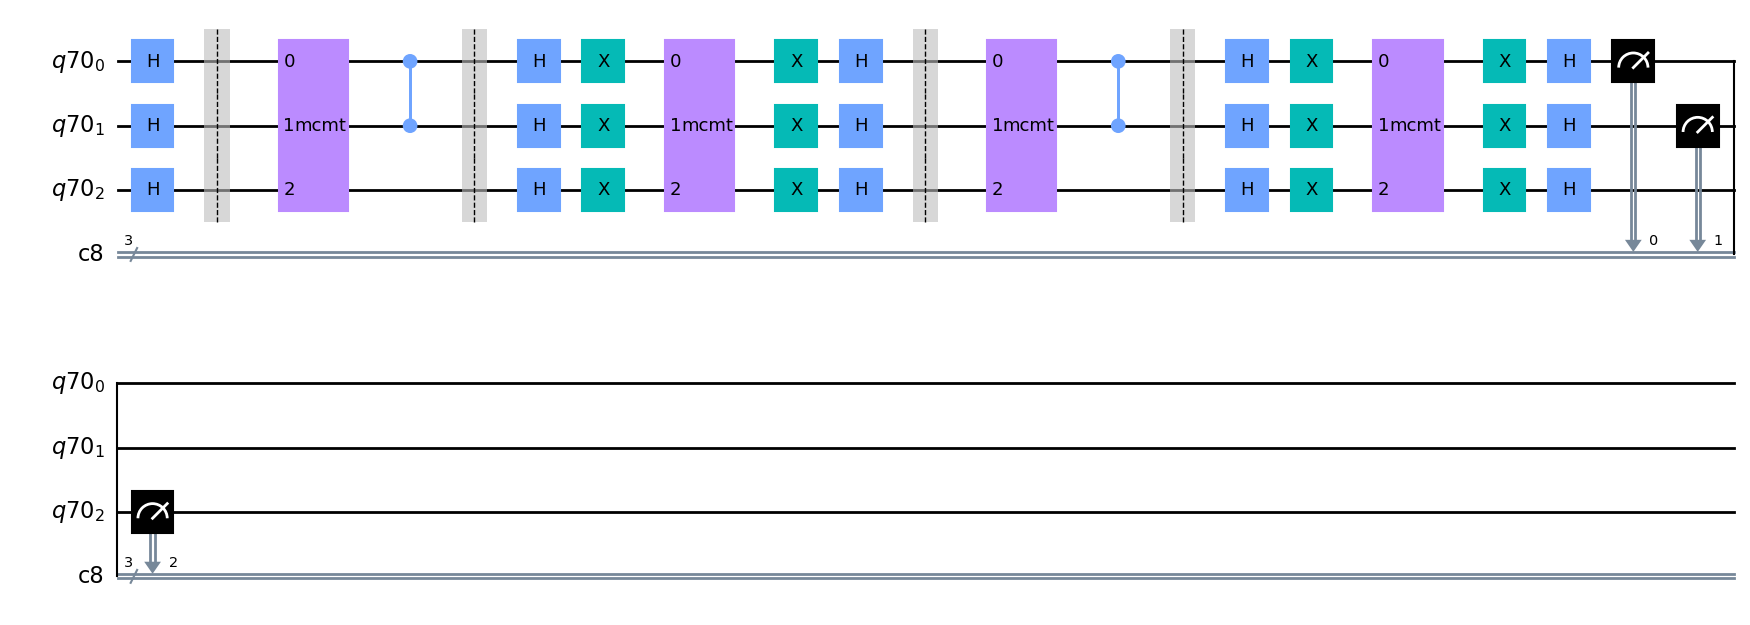

In [49]:
controls = QuantumRegister(3)
measure = ClassicalRegister(3)
circuit = QuantumCircuit(controls,measure)
circuit.h(controls)

Amp = MCMT('cz',2,1)
# cx1 = Operator(T1)
# circuit.unitary(cx1, [0, 1], label='cx1')
# circuit.barrier()

# cx2 = Operator(T2)
# circuit.unitary(cx2, [0, 1], label='cx2')
# circuit.barrier()

# cx3 = Operator(T3)
# circuit.unitary(cx3, [0, 1], label='cx3')
# circuit.barrier()

# cx4 = Operator(T4)
# circuit.unitary(cx4, [0, 1], label='cx4')

# cx = Operator(T)
##############################
for i in range(1):
    circuit.barrier()
    # circuit.unitary(cx, controls, label='cx4')

    circuit.append(Amp,[0,1,2])
    circuit.cz(0,1)

#     circuit.cz(0,1)
#     circuit.x([0,2])

    circuit.barrier()
    ###################################

    circuit.h(controls)
    circuit.x(controls)
#     Amp = MCMT('cz',2,1)
    circuit.append(Amp,[0,1,2])
    circuit.x(controls)
    circuit.h(controls)

    circuit.barrier()

    circuit.append(Amp,[0,1,2])
    circuit.cz(0,1)

#     circuit.cz(0,1)
#     circuit.x([0,2])

    circuit.barrier()
    ###################################

    circuit.h(controls)
    circuit.x(controls)
#     Amp = MCMT('cz',2,1)
    circuit.append(Amp,[0,1,2])
    circuit.x(controls)
    circuit.h(controls)

# circuit.barrier()

circuit.measure(controls,measure)


# circuit.decompose().decompose().draw(output='mpl')
circuit.draw(output='mpl')

In [477]:
np.sqrt(8) * np.pi/4

2.221441469079183

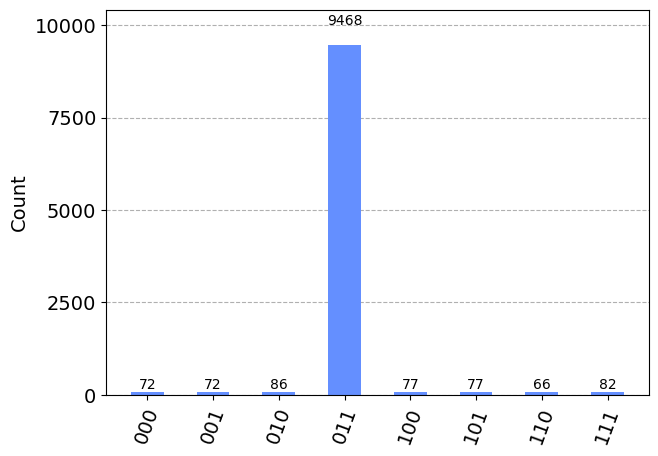

In [50]:
aer_sim = Aer.get_backend('aer_simulator')
# qobj = assemble(circuit)
t_qc = transpile(circuit, aer_sim) # sim = simulation
result = aer_sim.run(t_qc,shots=10000).result()
counts = result.get_counts()
plot_histogram(counts)

## 4 Qubit Search

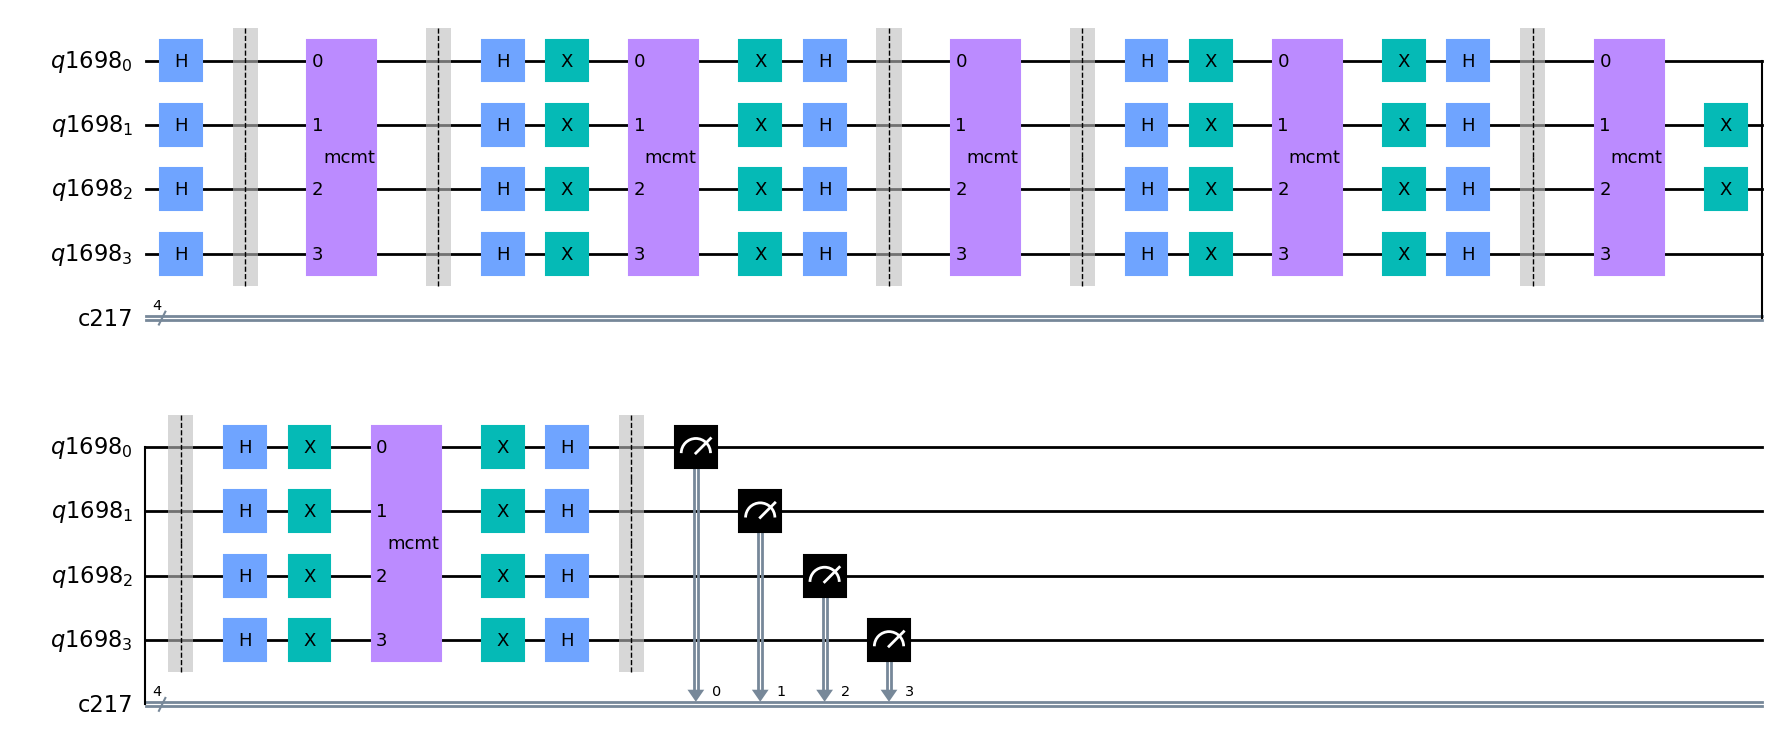

In [518]:
pets = QuantumRegister(4)
mice = ClassicalRegister(4)

farm = QuantumCircuit(pets,mice)
Amp = MCMT('cz',2,1)
Amp_D = MCMT('cz',3,1)
farm.h(pets)

#Oracle
for i in range(2):
    farm.barrier()
    # farm.append(Amp,[0,1,2])
    # farm.cz(0,1)
    farm.append(Amp_D,[0,1,2,3])
#     farm.x([1,2])
    # farm.cz(0,3)
    # farm.cz(2,3)
    # farm.cz(0,2)
    farm.barrier()

    #Diffuser

    farm.h(pets)
    farm.x(pets)

    farm.append(Amp_D,[0,1,2,3])
    farm.x(pets)
    farm.h(pets)
    
farm.barrier()
# farm.append(Amp,[0,1,2])
# farm.cz(0,1)
farm.append(Amp_D,[0,1,2,3])
farm.x([1,2])
# farm.cz(0,3)
# farm.cz(2,3)
# farm.cz(0,2)
farm.barrier()

#Diffuser

farm.h(pets)
farm.x(pets)

farm.append(Amp_D,[0,1,2,3])
farm.x(pets)
farm.h(pets)
farm.barrier()
farm.measure(pets,mice)
# farm.decompose().decompose().draw(output='mpl')
farm.draw(output='mpl')

In [511]:
np.sqrt(2**4) * np.pi/4

3.141592653589793

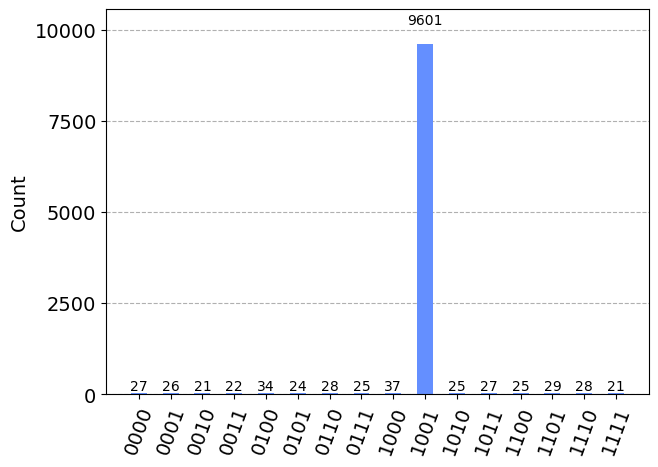

In [519]:
aer_sim = Aer.get_backend('aer_simulator')
# qobj = assemble(circuit)
t_qc = transpile(farm, aer_sim) # sim = simulation
result = aer_sim.run(t_qc,shots=10000).result()
counts = result.get_counts()
plot_histogram(counts)

In [1]:
Depth = []

## Hardware Run

In [145]:
from qiskit import *
IBMQ.save_account('9c4d6220f14334033534c511a90fe57aa148ac6862e428c48f7861bfd66cf9edf376b4c1e388d61e2041b79cb095c34b78c7a0c70cf2c100df64b397c458312c', overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
device = provider.get_backend('ibmq_quito')
job = execute(circuit,backend = device,shots = 1024)
print(job.job_id())


ibmqfactory.load_account:WARNING:2023-03-11 00:31:27,069: Credentials are already in use. The existing account in the session will be replaced.


640c123317012f27019dd049


In [99]:
from qiskit.providers.ibmq import least_busy

least_busy(provider.backends(simulator=False))

NameError: name 'provider' is not defined

Job Status: job has successfully run


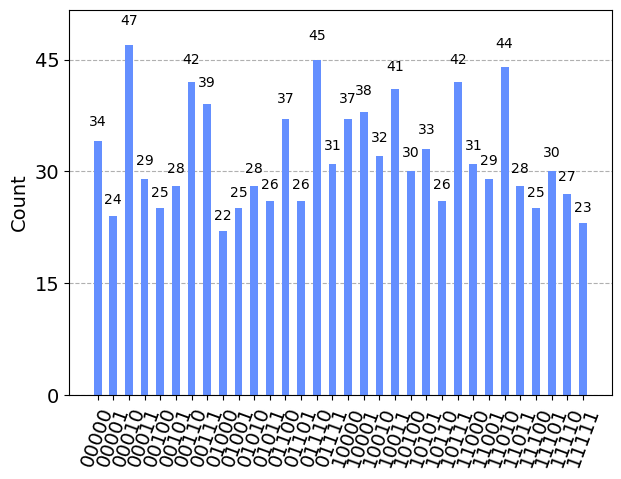

In [146]:
from qiskit.tools.monitor import job_monitor

job_monitor(job)

device_result = job.result()

plot_histogram(device_result.get_counts(circuit))

## Eye of Horus

How many qubits is your circuit?
2
What state would you like to retrieve?
01
12


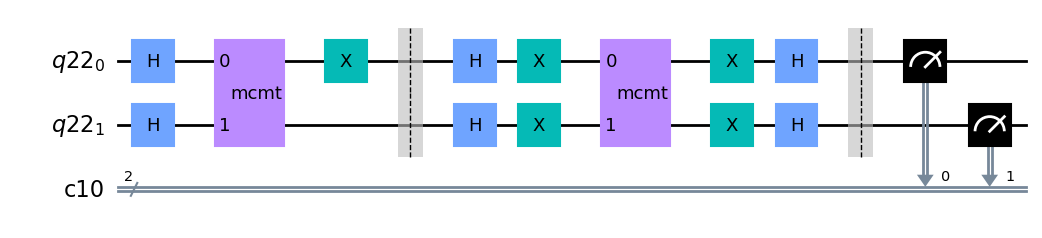

In [30]:
qubits = int(input("How many qubits is your circuit?\n"))
state = input("What state would you like to retrieve?\n")

iterations = math.floor(np.pi/4 * np.sqrt(2**qubits))

counter = 0
x_sequence = []

for i in state:
    if int(i) == 0:
        x_sequence.append(counter)
    counter=counter+1
    
Q = QuantumRegister(qubits)
C = ClassicalRegister(qubits)

circuit = QuantumCircuit(Q,C)
Amp = MCMT('cz',qubits-1,1)
Amp_Final = MCMT('cz',3,1)
circuit.h(Q)

for i in range(iterations-1):
    circuit.barrier()
    circuit.append(Amp,Q)
#     circuit.x(x_sequence)

    circuit.barrier()

    circuit.h(Q)
    circuit.x(Q)

    circuit.append(Amp,Q)
#     circuit.append(Amp_Final,[0,1,2,4])
    circuit.x(Q)
    circuit.h(Q)

    circuit.barrier()

circuit.append(Amp,Q)
circuit.x(x_sequence)

circuit.barrier()

circuit.h(Q)
circuit.x(Q)

circuit.append(Amp,Q)
#     circuit.append(Amp_Final,[0,1,2,4])
circuit.x(Q)
circuit.h(Q)

circuit.barrier()

circuit.measure(Q,C)

print(circuit.decompose().decompose().depth())
# circuit.decompose().decompose().draw(output='mpl')
circuit.draw(output='mpl')

In [22]:
def EyeofHorus(qubits,state):
    iterations = math.floor(np.pi/4 * np.sqrt(2**qubits))

    counter = 0
    x_sequence = []

    for i in state:
        if int(i) == 0:
            x_sequence.append(counter)
        counter=counter+1

    Q = QuantumRegister(qubits)
    C = ClassicalRegister(qubits)

    circuit = QuantumCircuit(Q,C)
    Amp = MCMT('cz',qubits-1,1)
    Amp_Final = MCMT('cz',3,1)
    circuit.h(Q)

    for i in range(iterations-1):
        circuit.barrier()
        circuit.append(Amp,Q)
    #     circuit.x(x_sequence)

        circuit.barrier()

        circuit.h(Q)
        circuit.x(Q)

        circuit.append(Amp,Q)
    #     circuit.append(Amp_Final,[0,1,2,4])
        circuit.x(Q)
        circuit.h(Q)

        circuit.barrier()

    circuit.append(Amp,Q)
    circuit.x(x_sequence)

    circuit.barrier()

    circuit.h(Q)
    circuit.x(Q)

    circuit.append(Amp,Q)
    #     circuit.append(Amp_Final,[0,1,2,4])
    circuit.x(Q)
    circuit.h(Q)

    circuit.barrier()
    circuit.measure(Q,C)
    T = circuit.decompose().decompose().depth()
    return T

In [33]:
Depth_CNOT = []

for r in range(2,11):
    Depth_CNOT.append(EyeofHorus(r,'0'+'1' * (r-1)))

In [40]:
Depth_CZ = [12, 70, 225, 619, 1886, 5075, 15290, 43421, 127853]# Depth of circuits with accurate method

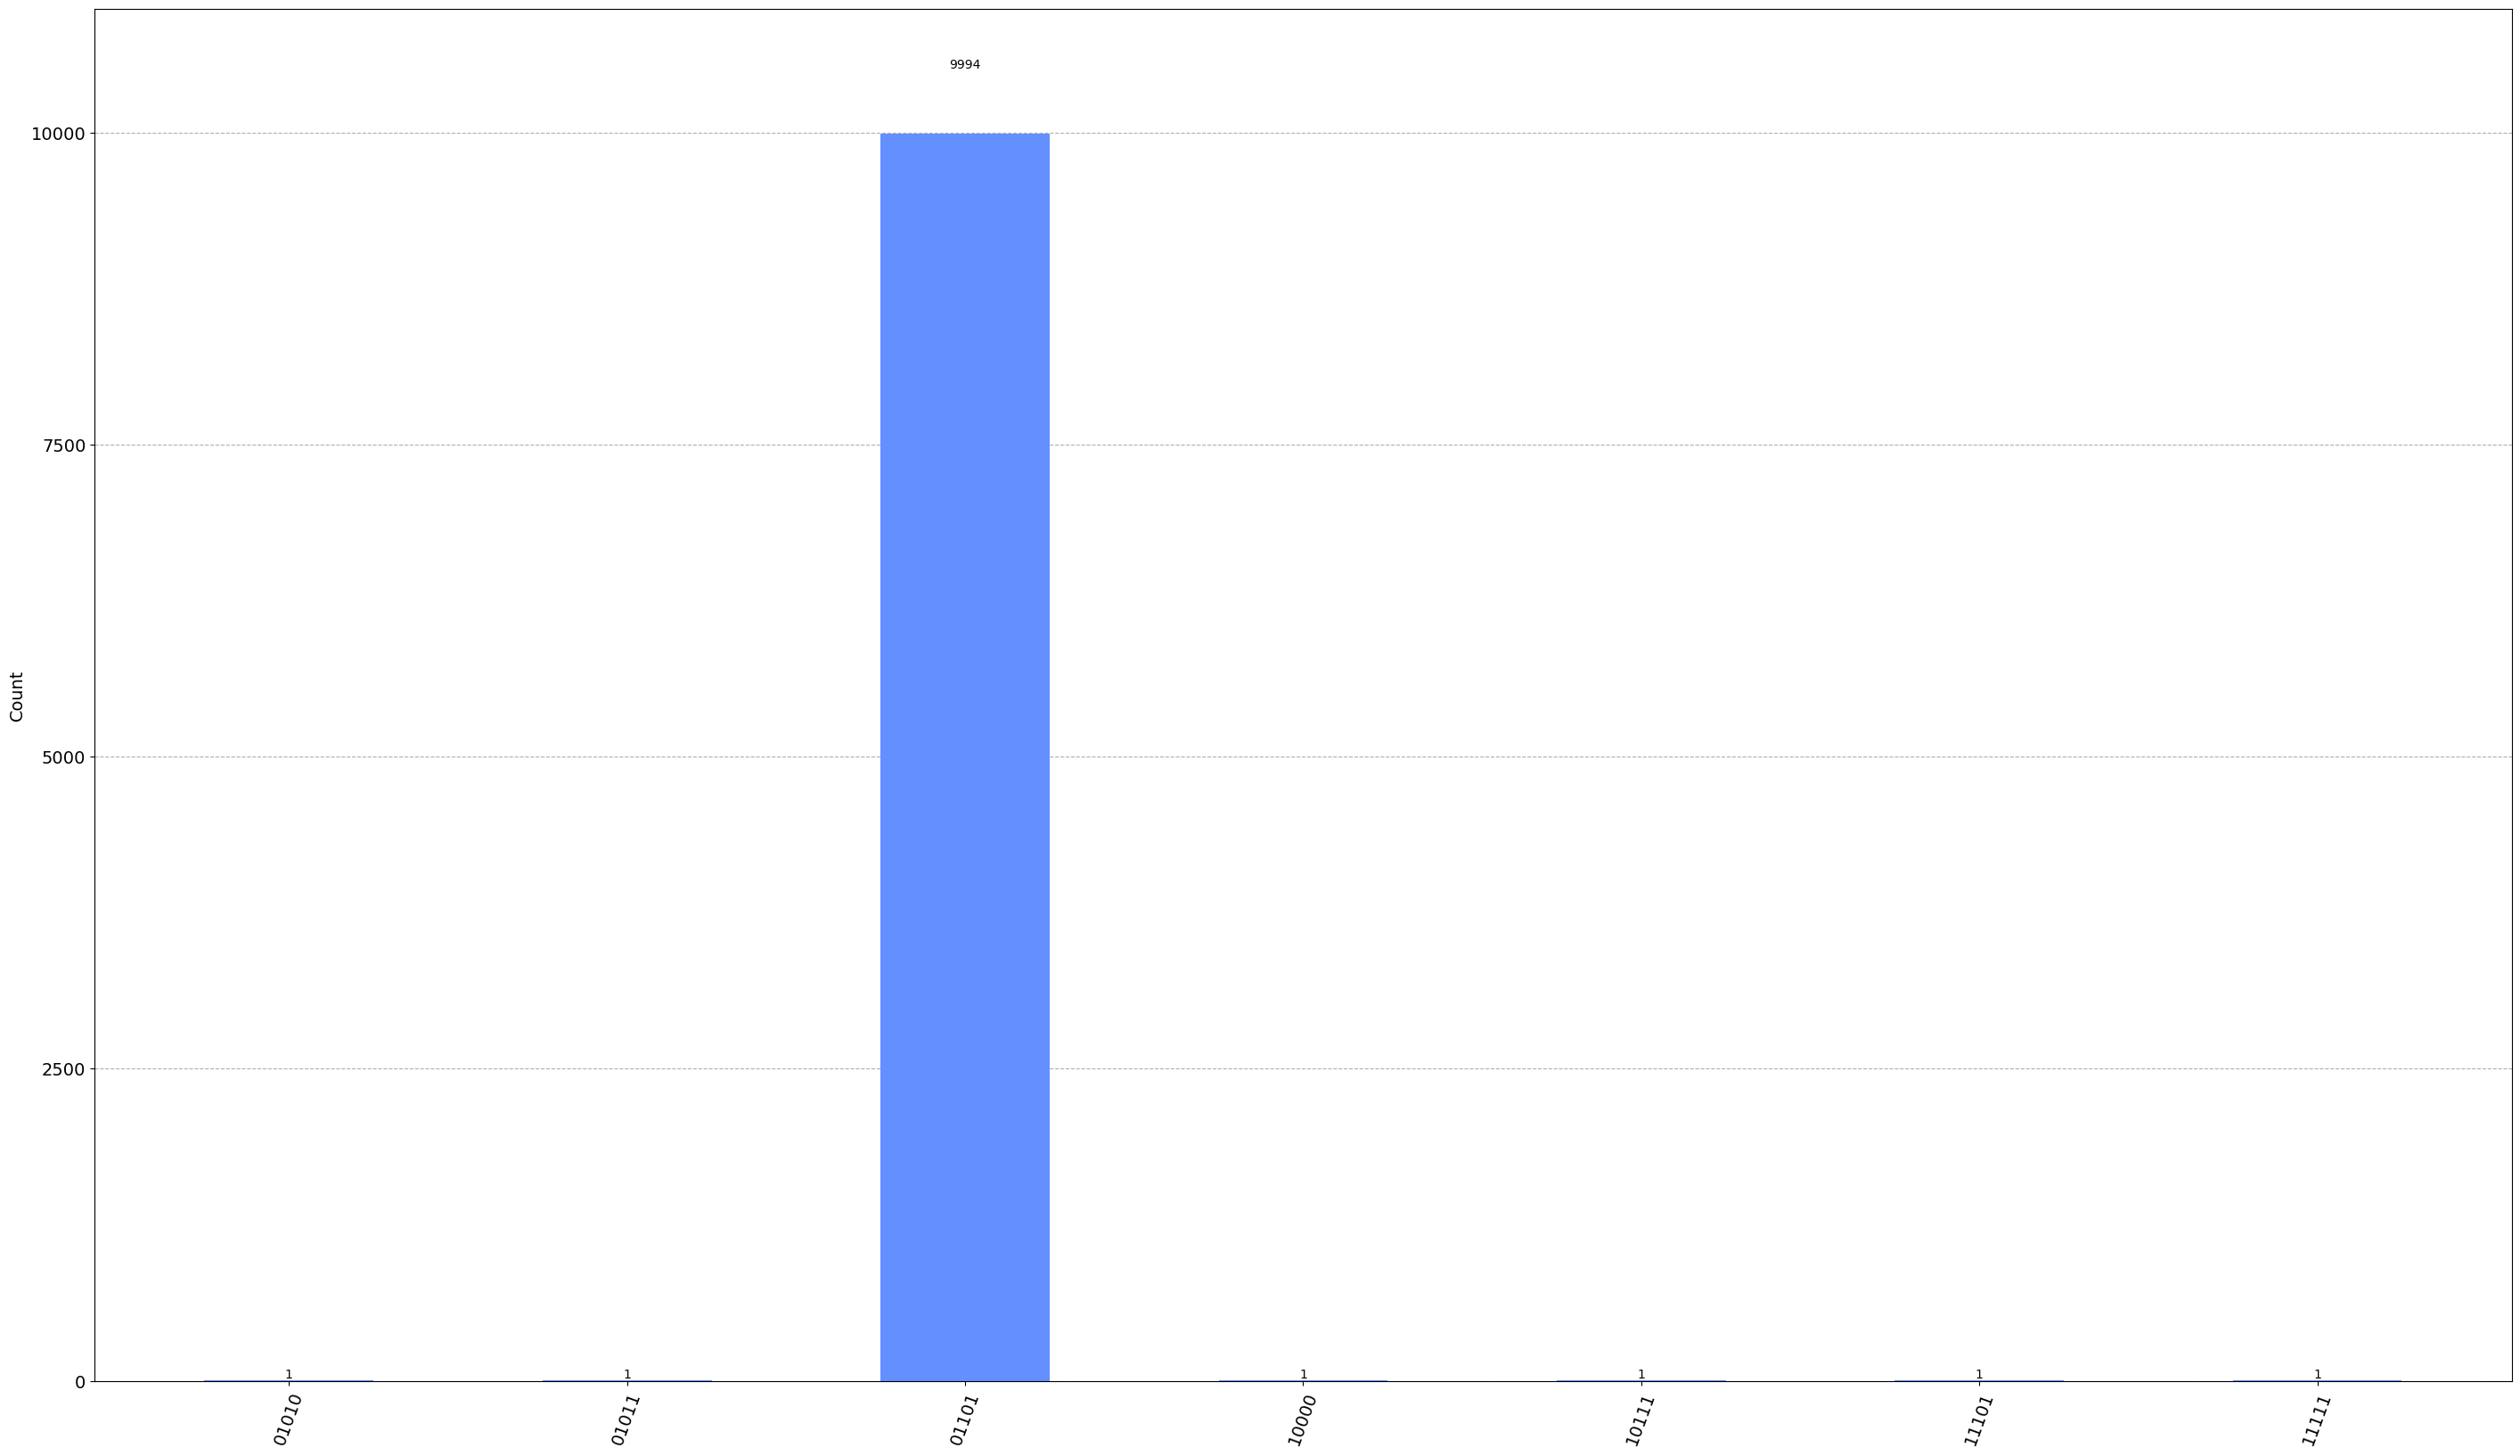

In [162]:
aer_sim = Aer.get_backend('aer_simulator')
# qobj = assemble(circuit)
t_qc = transpile(circuit, aer_sim) # sim = simulation
result = aer_sim.run(t_qc,shots=10000).result()
counts = result.get_counts()
plot_histogram(counts,figsize = (35,20))

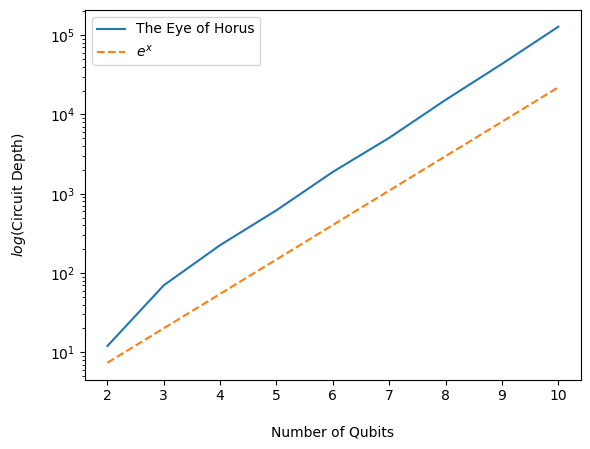

In [80]:
x = [i for i in range(2,11)]
y = [13, 36, 77, 157,316,636,1277,2557,5116] # Noisy Method

t = np.linspace(2,10,100)
z = np.exp(t) #Exponential
r = t**4   
plt.yscale("log")
#Polynomial
plt.xlabel('\nNumber of Qubits')
plt.ylabel('$log($Circuit Depth$)$\n')
plt.plot(x,Depth,label='The Eye of Horus')
plt.plot(t,z,label='$e^x$',linestyle='--')

plt.legend()

## Equivalent Gates

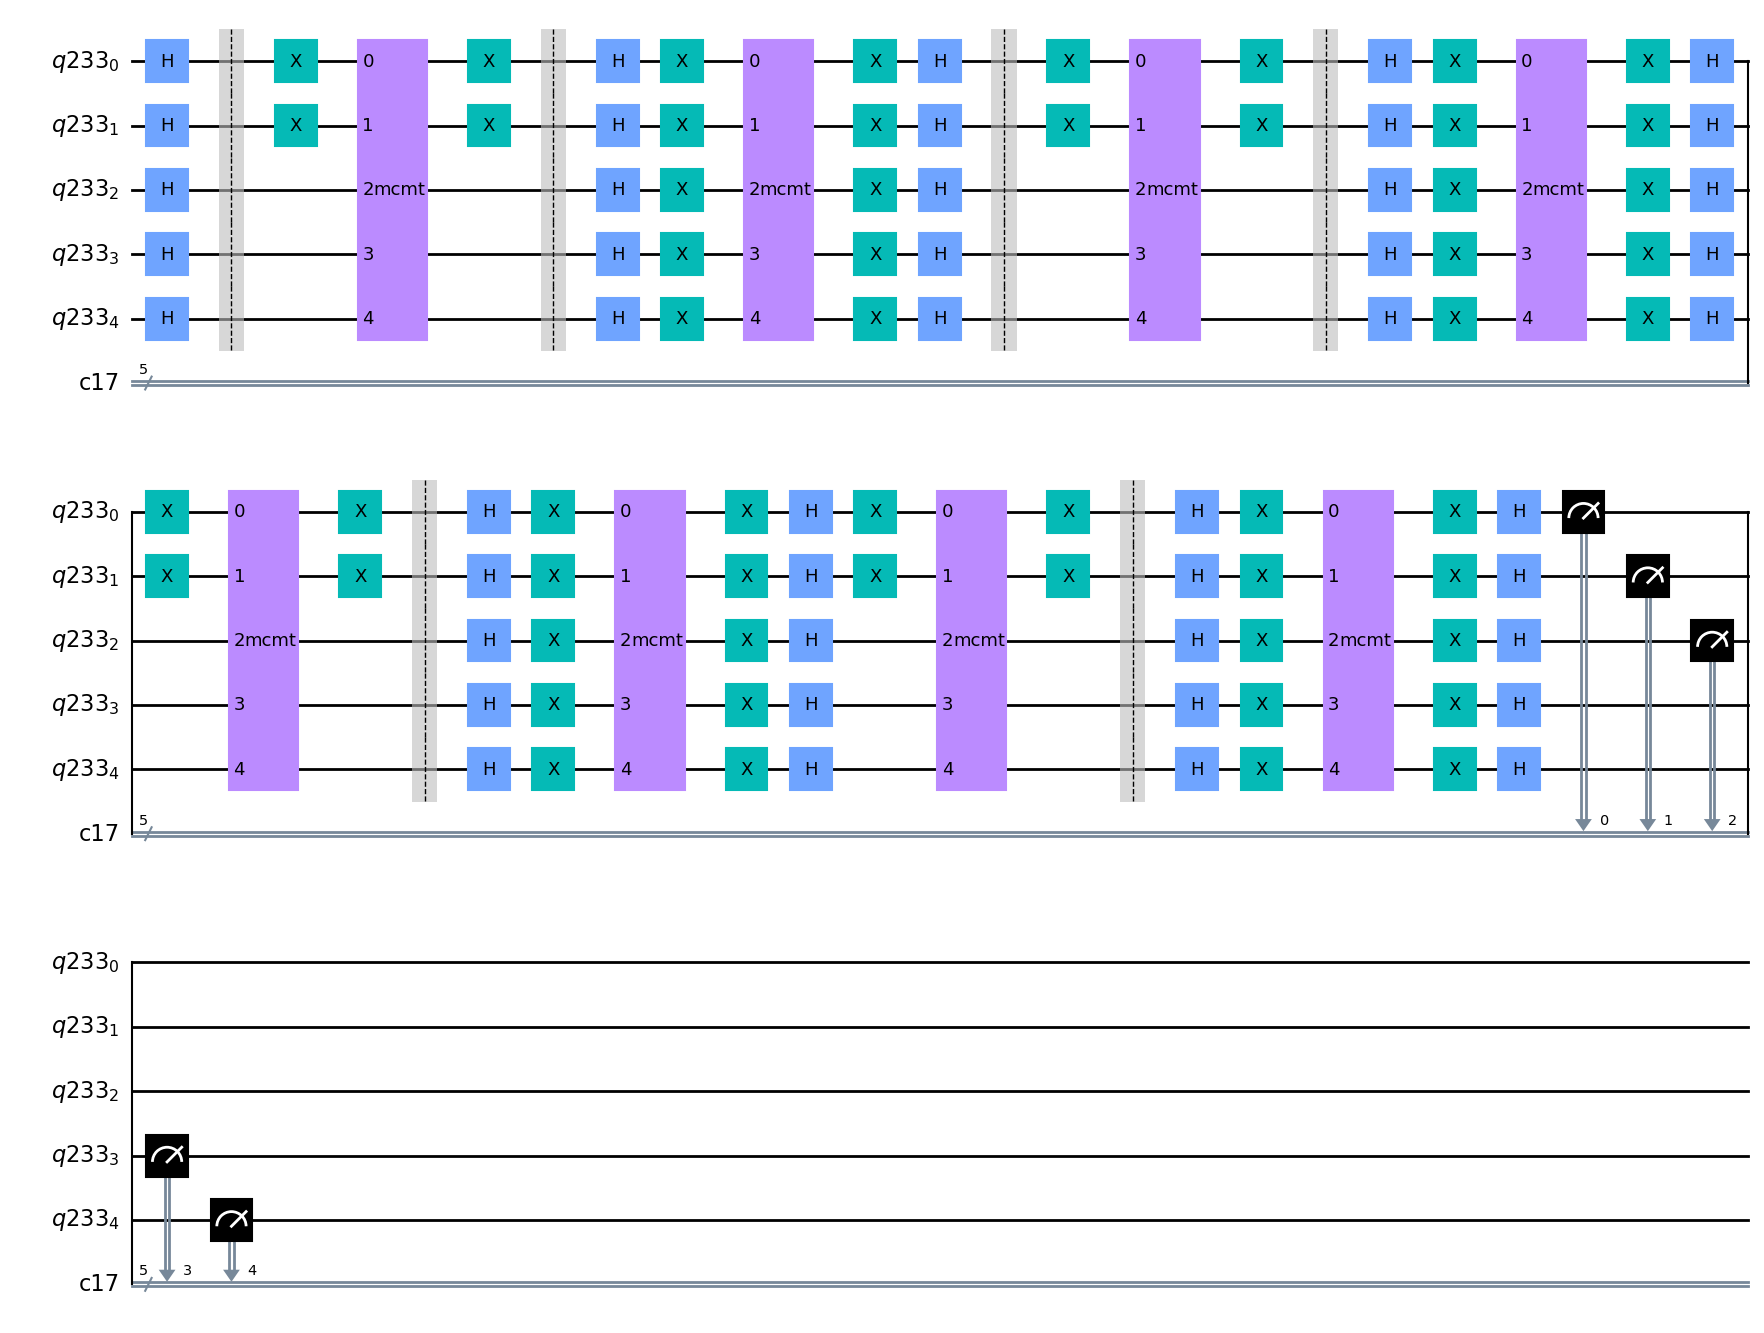

In [75]:
qubits = 5
Q = QuantumRegister(qubits)
C = ClassicalRegister(qubits)

circuit = QuantumCircuit(Q,C)
Amp = MCMT('cz',qubits-1,1)
Amp_Final = MCMT('cz',3,1)
# X_Amp = MCMT('cz')
# circuit.x(Q)
# circuit.ccx(0,1,2)
circuit.h(Q)



# circuit.barrier()
# circuit.append(Amp,Q)
# # circuit.cz(0,2)
# # circuit.ccx(0,1,2)
# # circuit.cz(1,0)
# # circuit.cz(0,1)
# # circuit.x([2])
# # circuit.cz(1,0)  
# # circuit.cz(0,1)
# # circuit.cz(1,2) 
# # circuit.ccx(0,1,2)

# # circuit.cx(0,2)
# # circuit.cz(1,2)


# circuit.barrier()
# # circuit.h(Q)

# circuit.h(Q)
# circuit.x(Q)

# circuit.append(Amp,Q)
# circuit.x(Q)
# circuit.h(Q)

for i in range(1):
    circuit.barrier()
    circuit.x([0,1])
    circuit.append(Amp,Q)
    circuit.x([0,1])

#     circuit.x([1,2])
    # circuit.z([0,1,2])

    circuit.barrier()
    # circuit.h(Q)

    circuit.h(Q)
    circuit.x(Q)

    circuit.append(Amp,Q)
    circuit.x(Q)
    circuit.h(Q)

    circuit.barrier()

# circuit.barrier()
circuit.x([0,1])
circuit.append(Amp,Q)
circuit.x([0,1])

# circuit.z([0,1,2])

circuit.barrier()
# circuit.h(Q)

circuit.h(Q)
circuit.x(Q)

circuit.append(Amp,Q)
circuit.x(Q)
circuit.h(Q)

circuit.x([0,1])
circuit.append(Amp,Q)
circuit.x([0,1])

# circuit.z([0,1,2])

circuit.barrier()
# circuit.h(Q)

circuit.h(Q)
circuit.x(Q)

circuit.append(Amp,Q)
circuit.x(Q)
circuit.h(Q)

circuit.x([0,1])
circuit.append(Amp,Q)
circuit.x([0,1])

# circuit.z([0,1,2])

circuit.barrier()
# circuit.h(Q)

circuit.h(Q)
circuit.x(Q)

circuit.append(Amp,Q)
circuit.x(Q)
circuit.h(Q)
# circuit.barrier()
# circuit.cz(0,1)
# circuit.cz(0,2)
# circuit.cz(1,2)
# circuit.cz(0,3)
# circuit.cz(0,4)
# circuit.cz(0,5)

# circuit.barrier()
# # circuit.h(Q)

# circuit.h(Q)
# circuit.z(Q)

# circuit.append(Amp,Q)
# circuit.z(Q)
# circuit.h(Q)



circuit.measure(Q,C)
circuit.draw(output='mpl')
# circuit.decompose().decompose().draw(output='mpl')

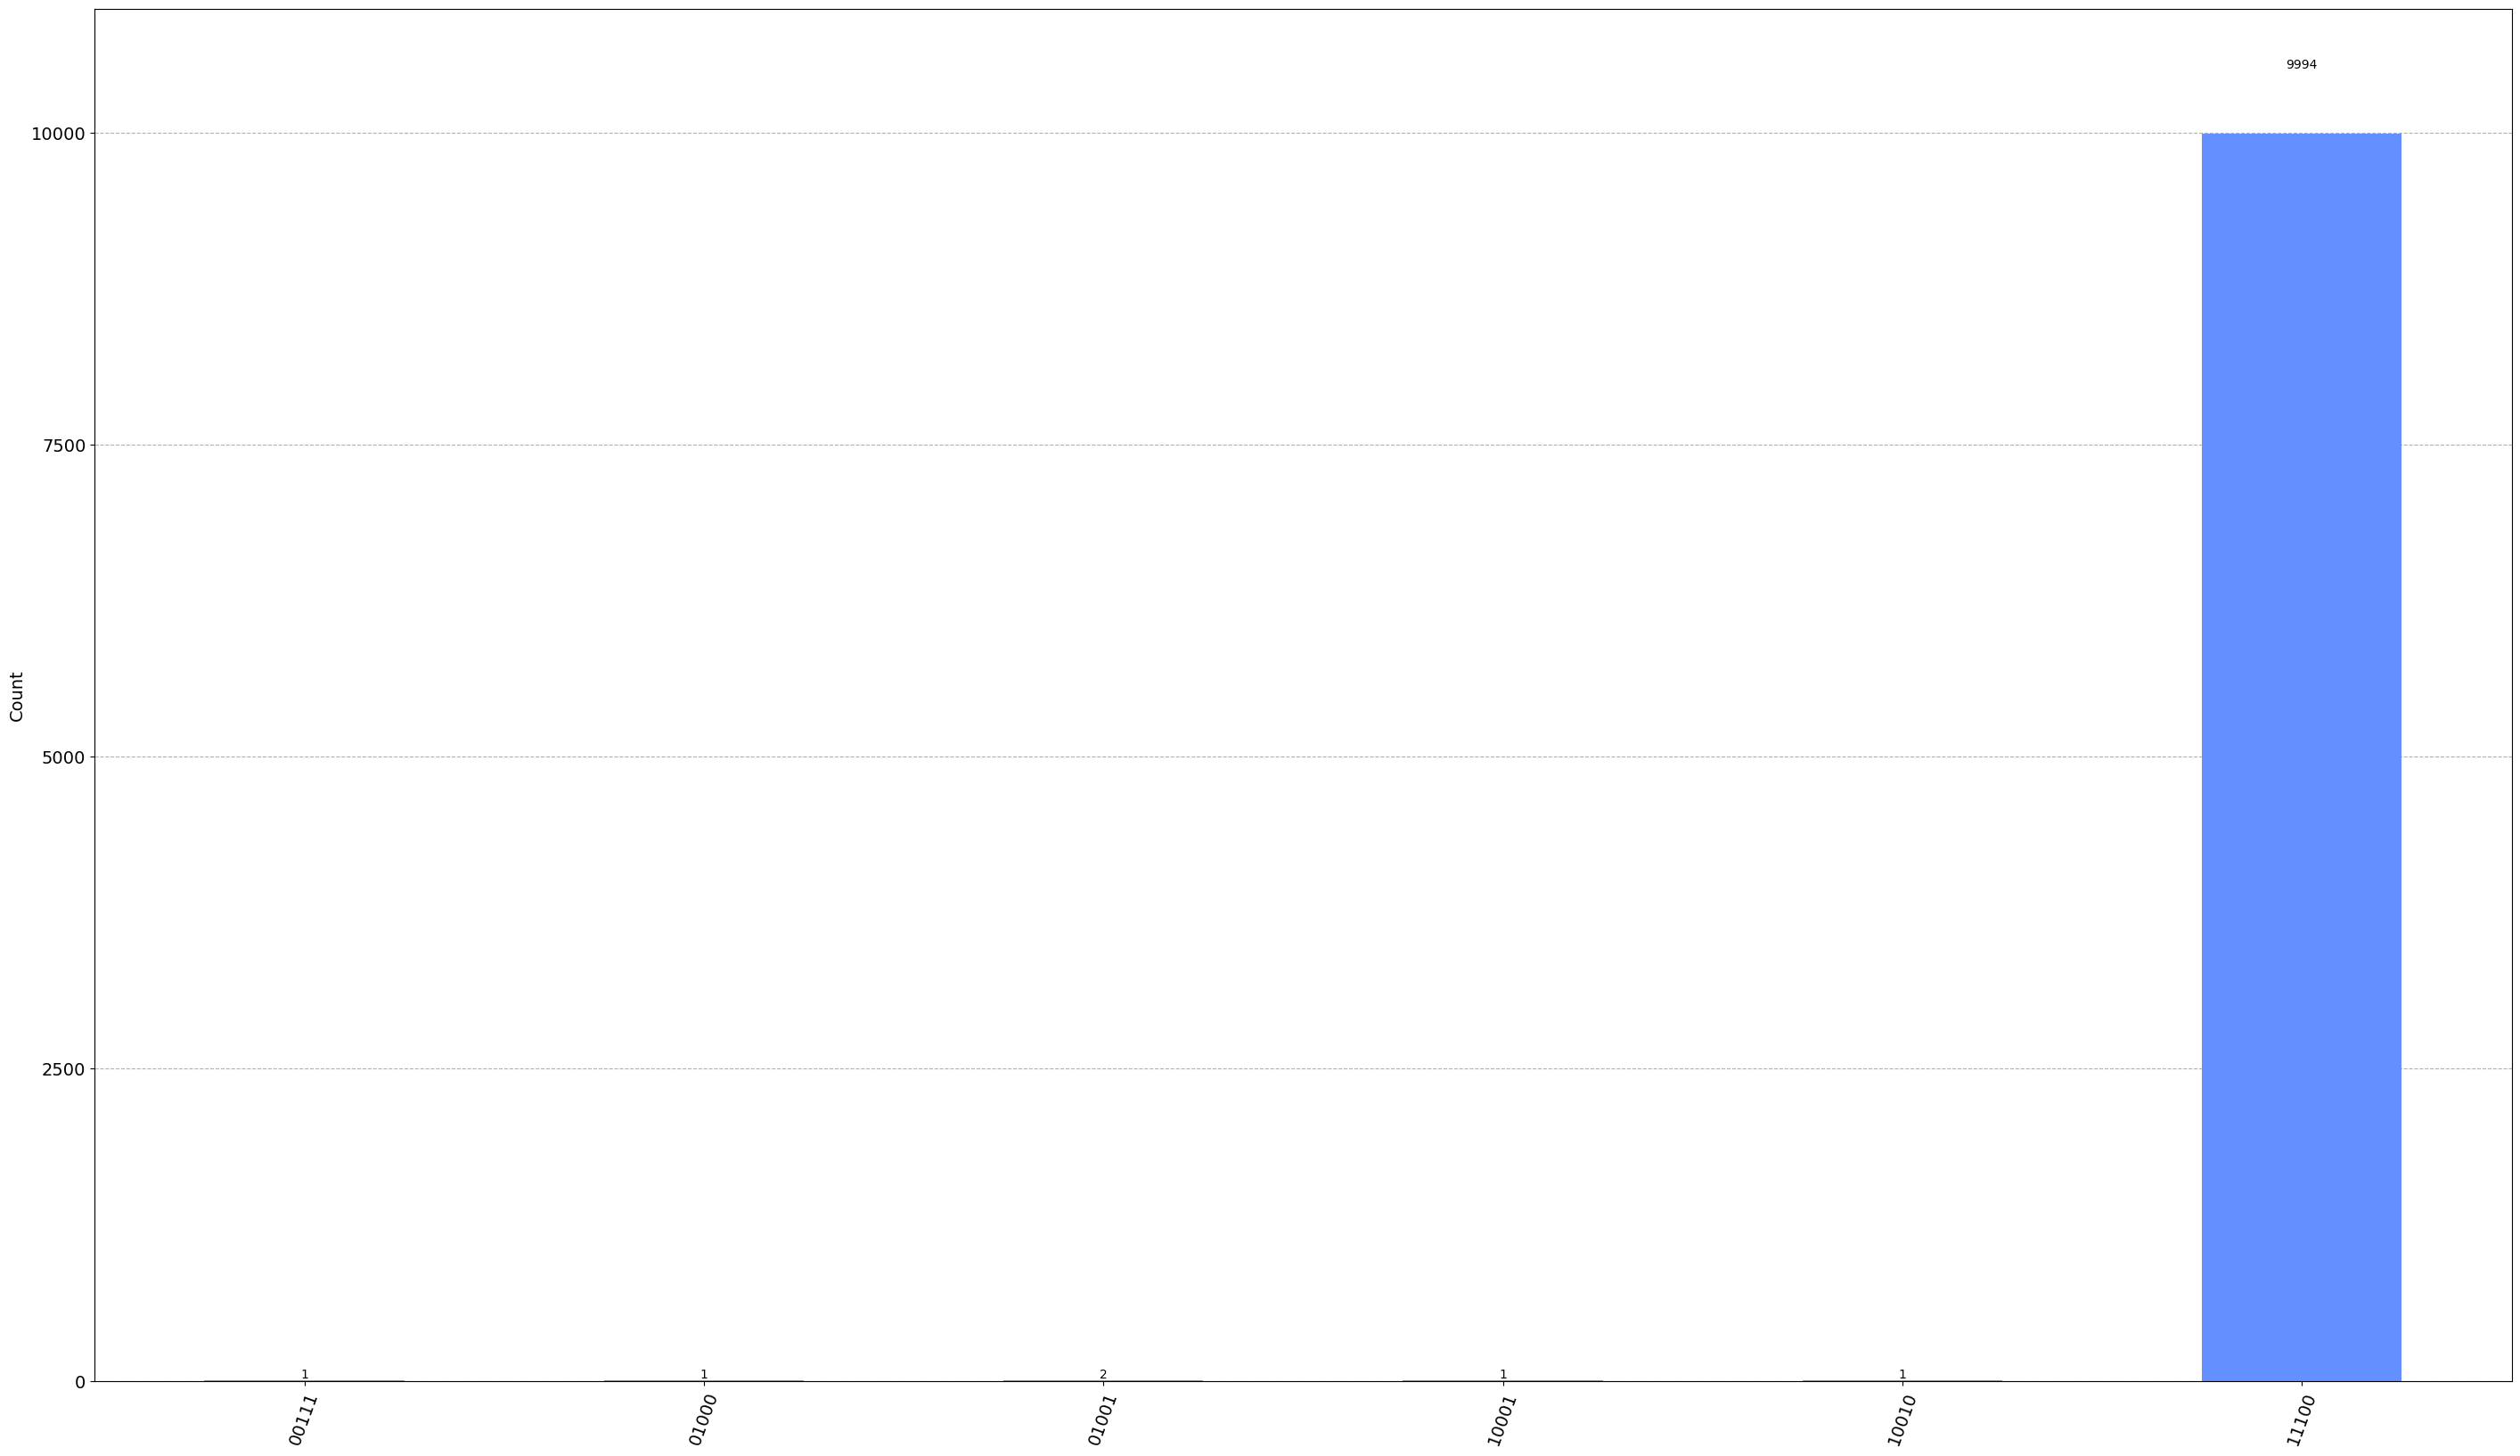

In [76]:
aer_sim = Aer.get_backend('aer_simulator')
# qobj = assemble(circuit)
t_qc = transpile(circuit, aer_sim) # sim = simulation
result = aer_sim.run(t_qc,shots=10000).result()
counts = result.get_counts()
plot_histogram(counts,figsize = (35,20))

In [96]:
q2 = QuantumRegister(2,"qreg")
c2 = ClassicalRegister(2,"creg")
qc2 = QuantumCircuit(q2,c2)


qc2.x(q2[1])
qc2.z(q2[0])
qc2.h(q2[1])
qc2.x(q2[0])
# qc2.measure(q2,c2)
qc2.draw('mpl')
# qc2.to_matrix()
job = execute(qc2,Aer.get_backend('unitary_simulator'))
counts = job.result().get_unitary()
# print(counts) # counts is a dictionary

## CNOT Eye of Horus

How many qubits is your circuit?
6
What state would you like to retrive?
100110


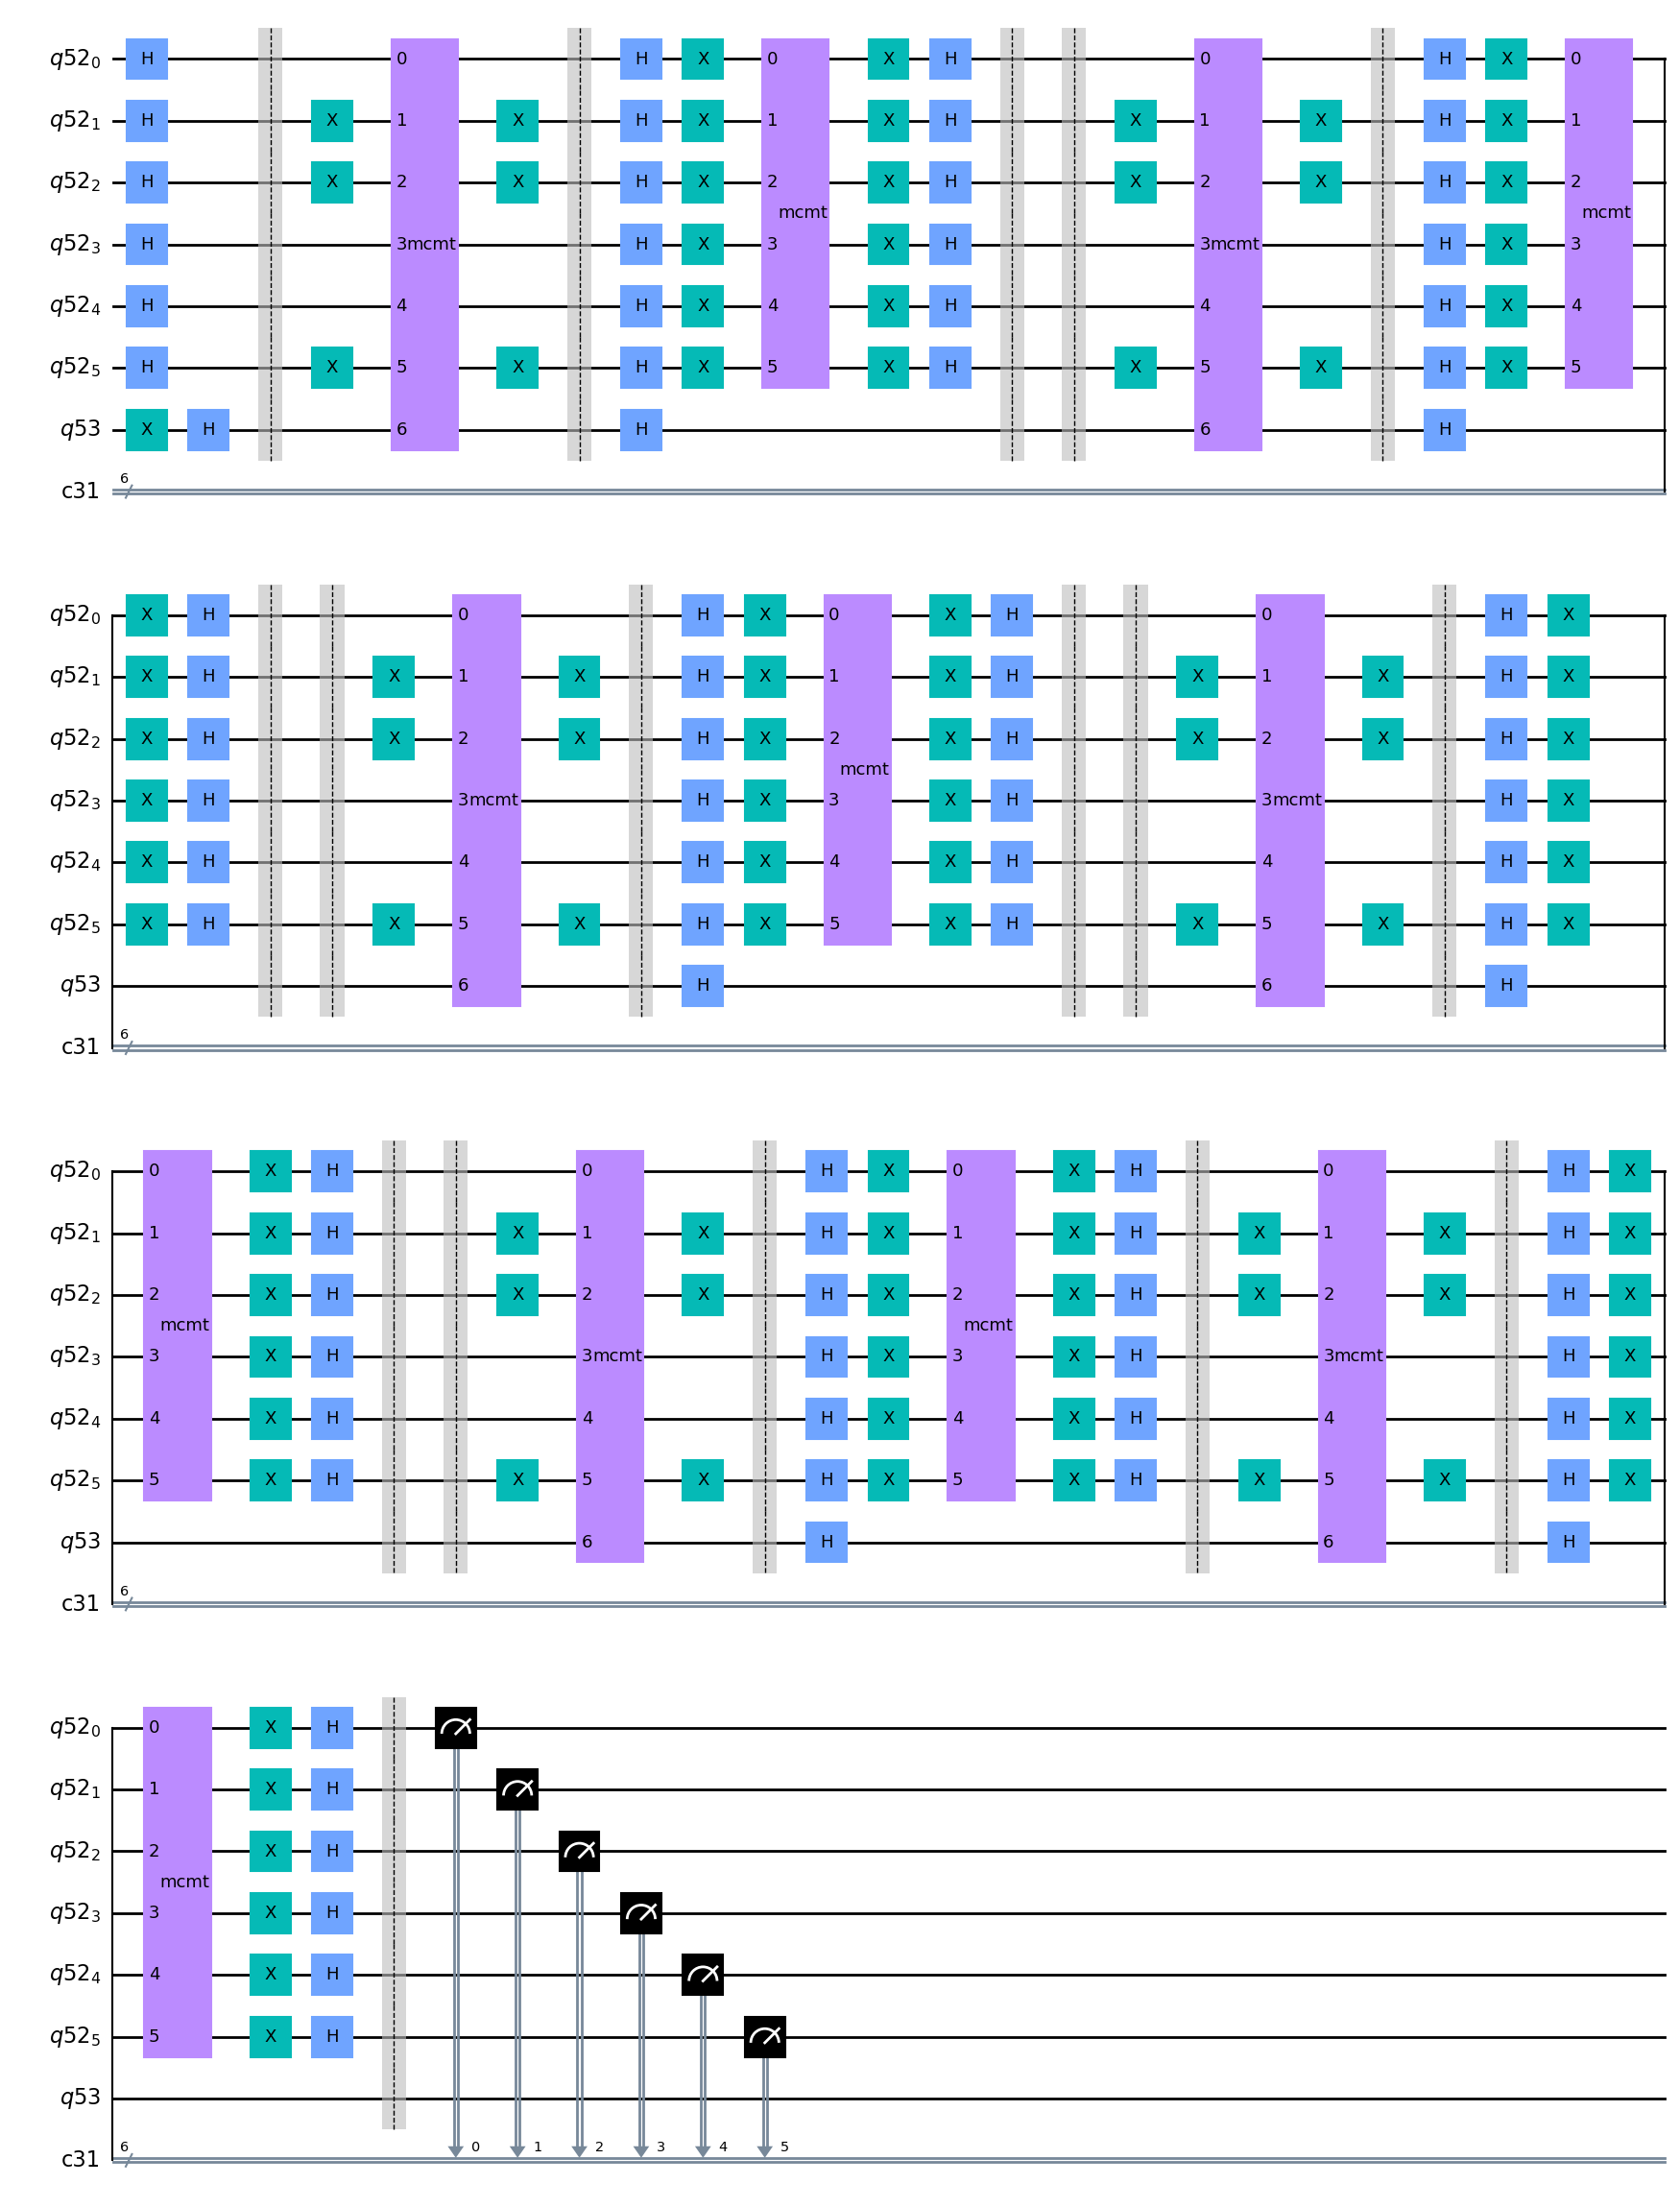

In [48]:
qubits = int(input("How many qubits is your circuit?\n"))
state = input("What state would you like to retrive?\n")

iterations = math.floor(np.pi/4 * np.sqrt(2**qubits))

counter = 0
x_sequence = []

for i in state:
    if int(i) == 0:
        x_sequence.append(counter)
    counter=counter+1
    
Q = QuantumRegister(qubits)
A = QuantumRegister(1)
C = ClassicalRegister(qubits)

circuit = QuantumCircuit(Q,A,C)
Amp_Z = MCMT('cz',qubits-1,1)
Amp = MCMT('cx',qubits,1)
circuit.x(A)

circuit.h(Q)
circuit.h(A)

for i in range(iterations-1):
    circuit.barrier()
    circuit.x(x_sequence)
    circuit.append(Amp,[i for i in range(qubits+1)])
    circuit.x(x_sequence)

    circuit.barrier()

    circuit.h(Q)
    circuit.h(A)
    circuit.x(Q)

    circuit.append(Amp_Z,Q)
#     circuit.append(Amp_Final,[0,1,2,4])
    circuit.x(Q)
    circuit.h(Q)

    circuit.barrier()
circuit.x(x_sequence)
circuit.append(Amp,[i for i in range(qubits+1)])
circuit.x(x_sequence)

circuit.barrier()

circuit.h(Q)
circuit.h(A)
circuit.x(Q)

circuit.append(Amp_Z,Q)
#     circuit.append(Amp_Final,[0,1,2,4])
circuit.x(Q)
circuit.h(Q)

circuit.barrier()

circuit.measure(Q,C)

# print(circuit.decompose().decompose().depth())
# circuit.decompose().decompose().draw(output='mpl')
circuit.draw(output='mpl')

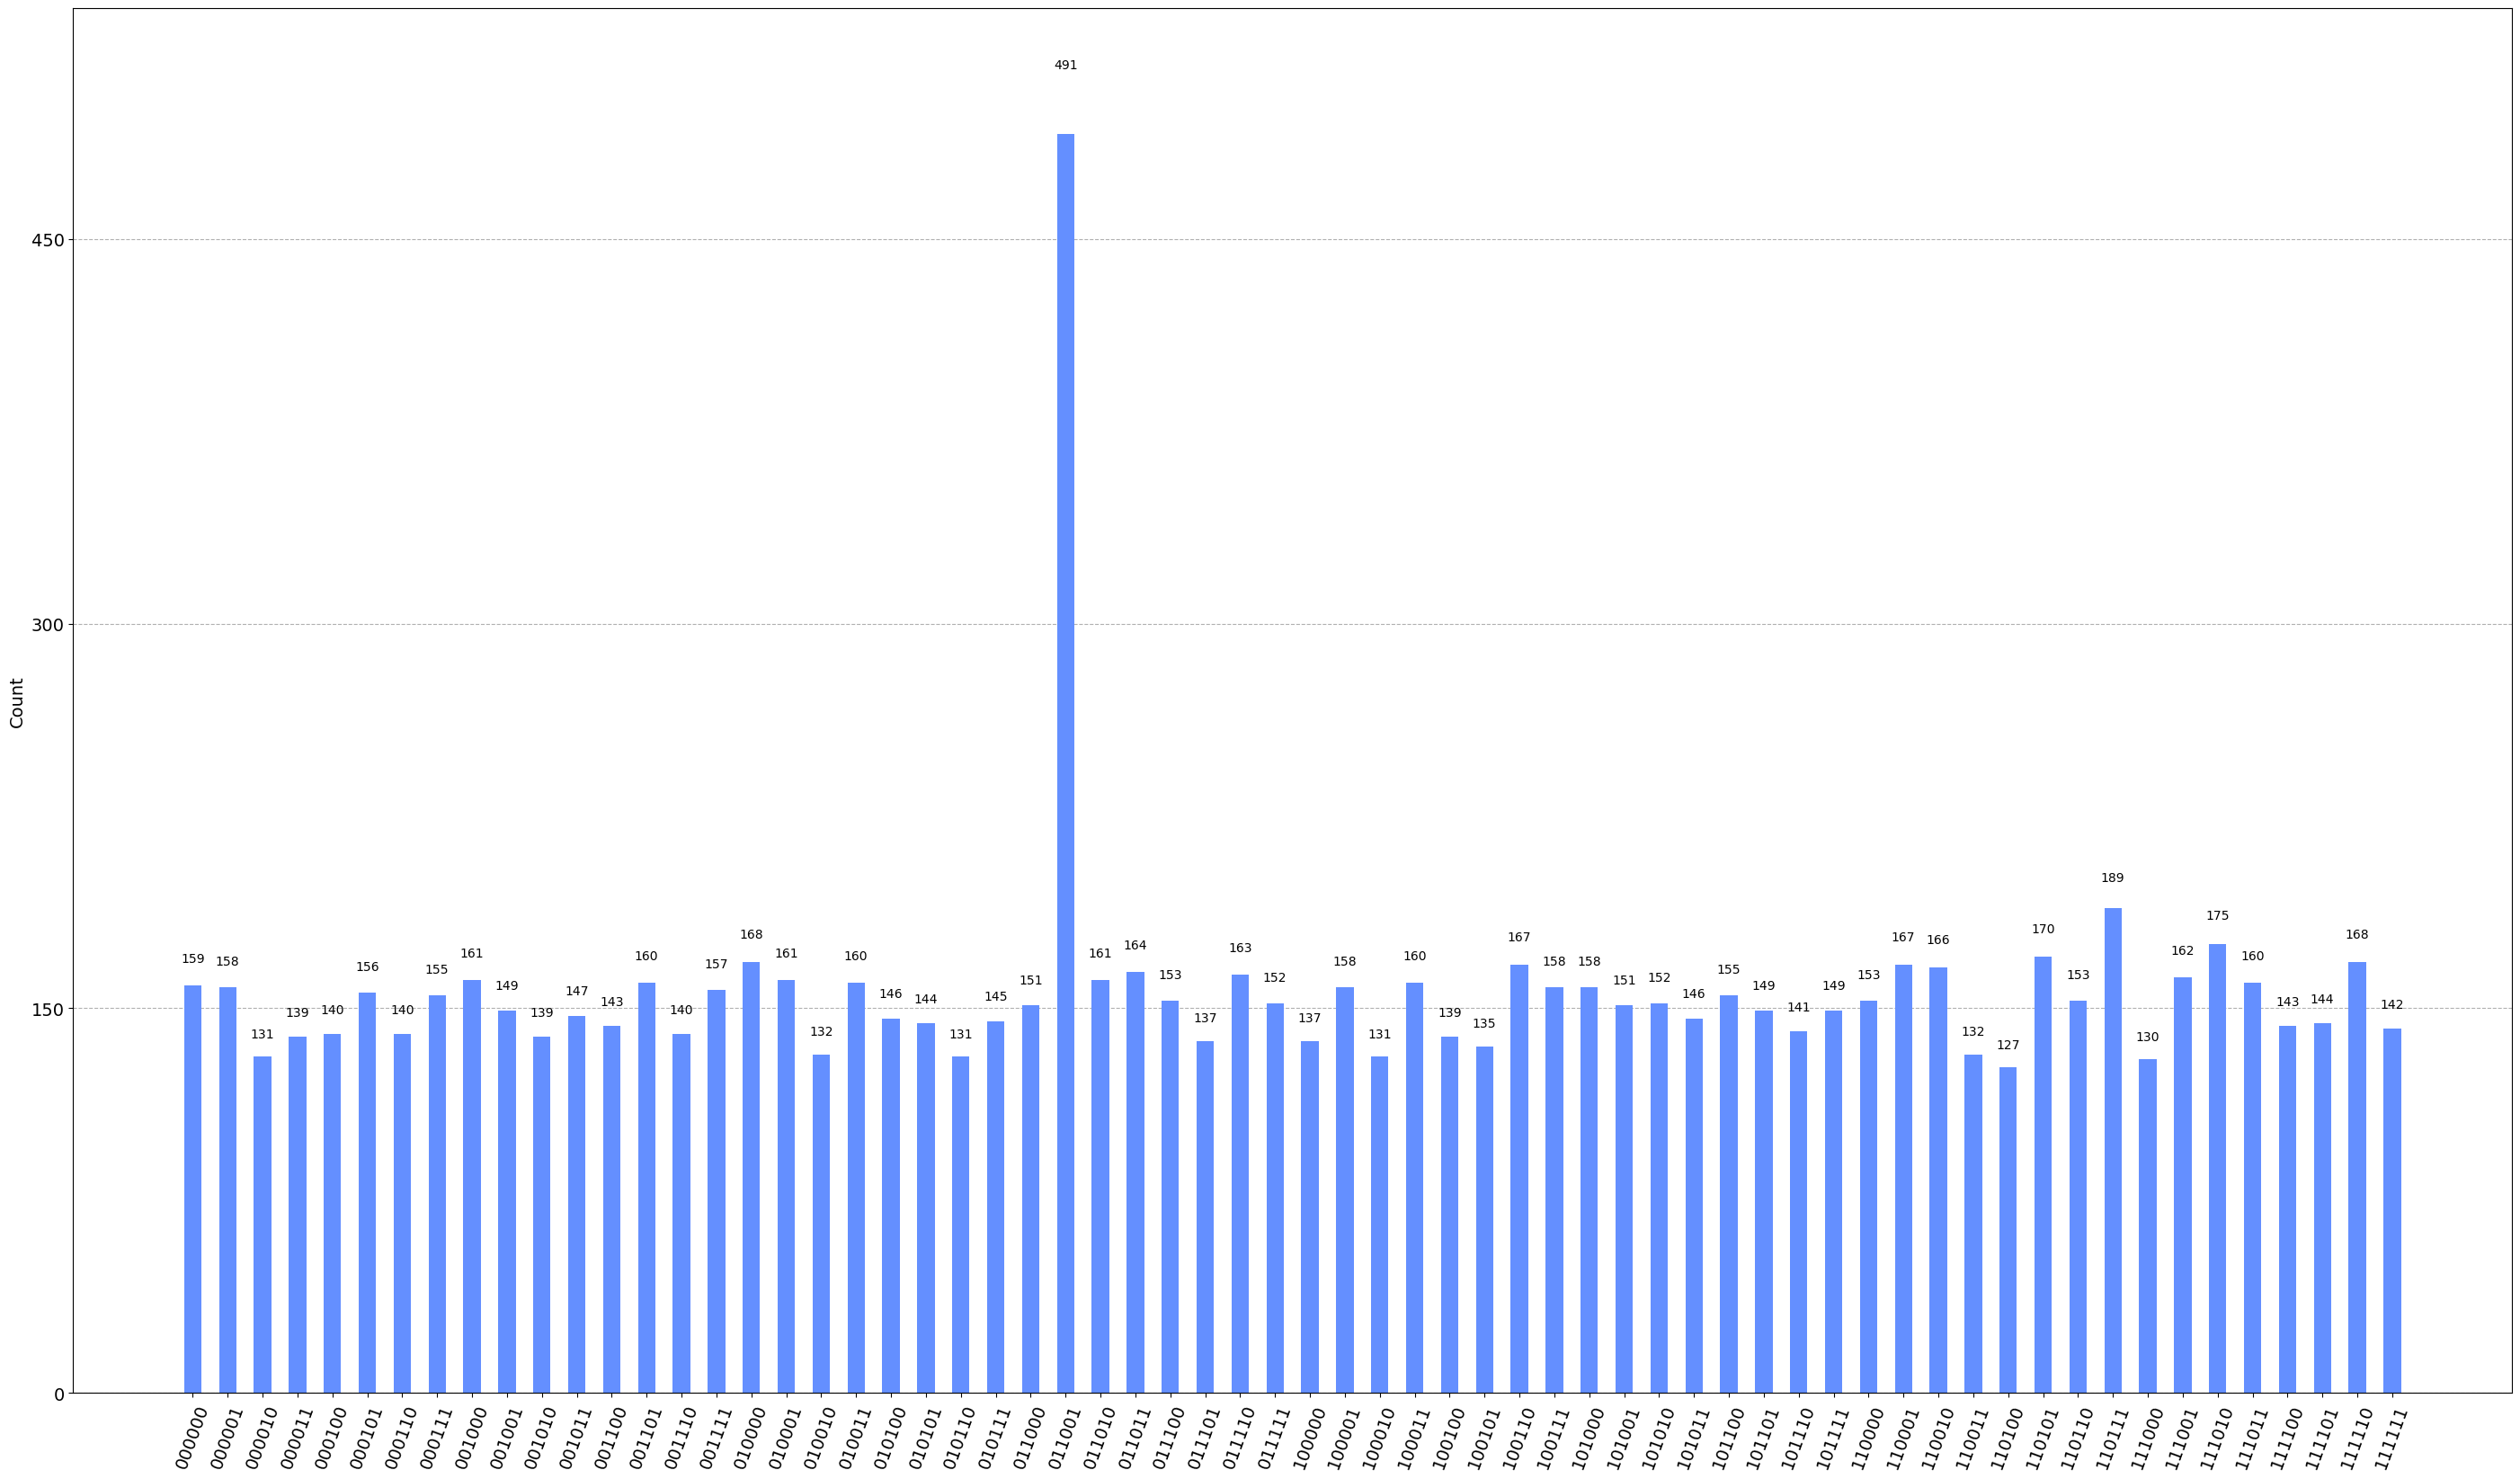

In [49]:
aer_sim = Aer.get_backend('aer_simulator')
# qobj = assemble(circuit)
t_qc = transpile(circuit, aer_sim) # sim = simulation
result = aer_sim.run(t_qc,shots=10000).result()
counts = result.get_counts()
plot_histogram(counts,figsize = (35,20))

## Trial Circuits

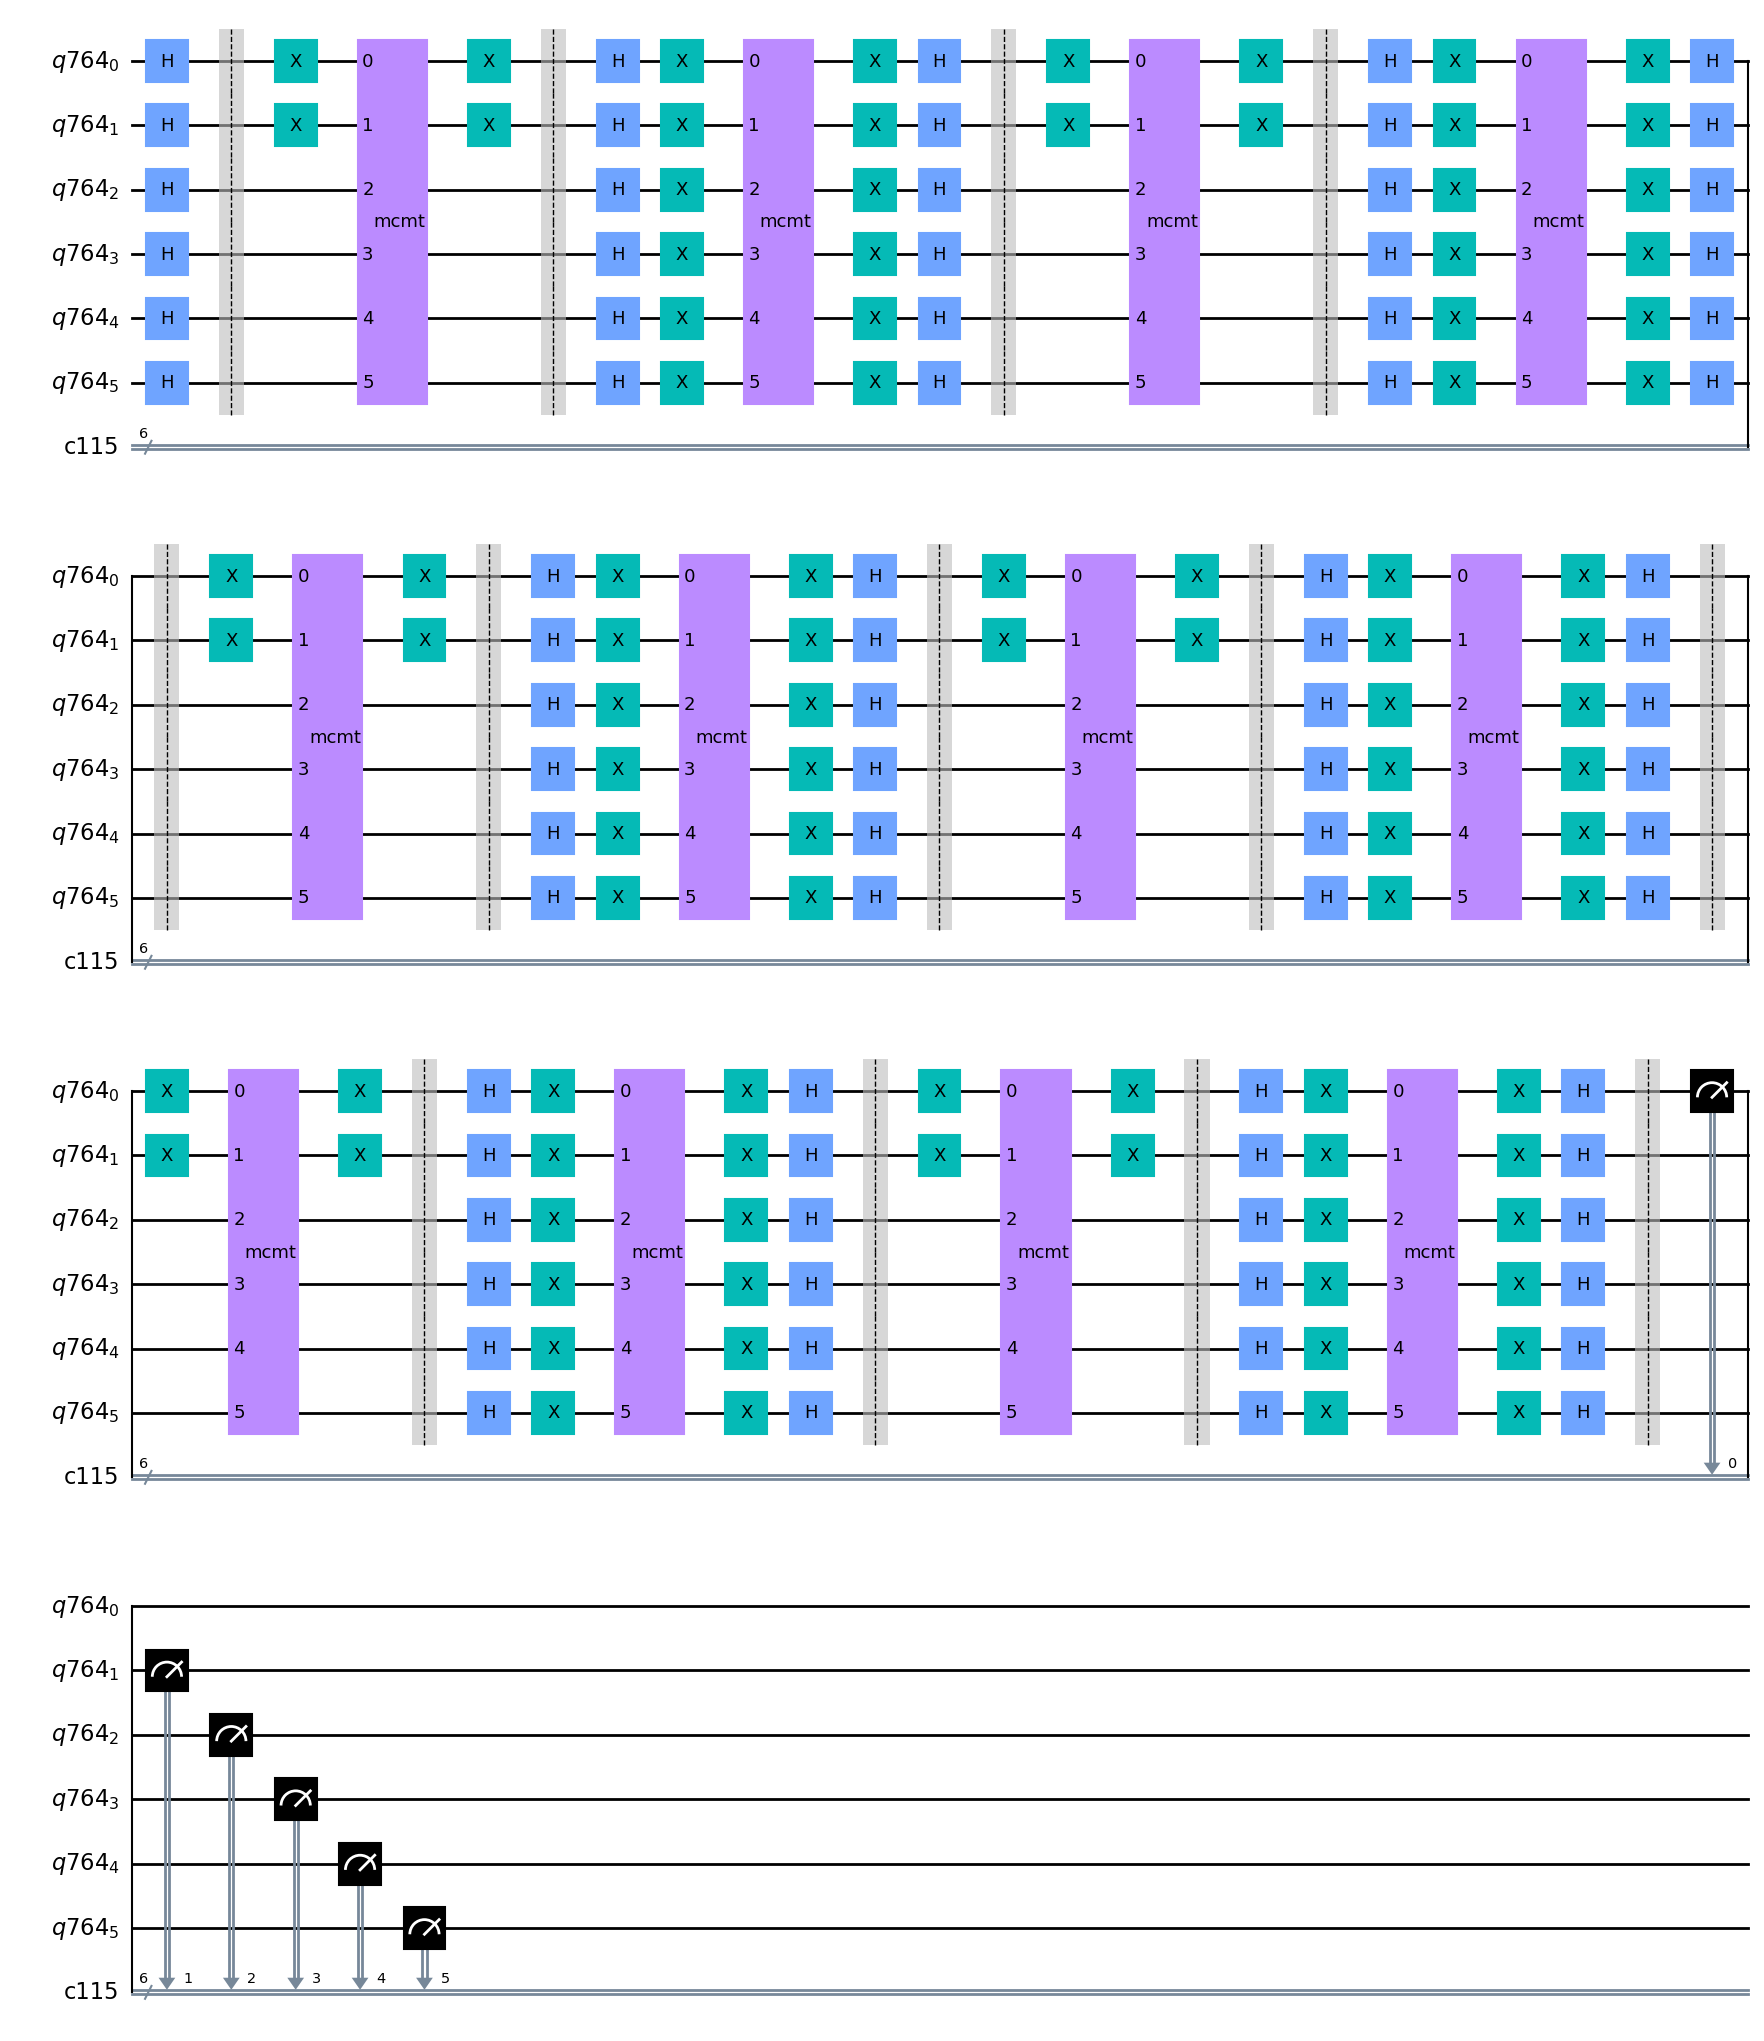

In [295]:
pets = QuantumRegister(6)
mice = ClassicalRegister(6)

farm = QuantumCircuit(pets,mice)
Amp = MCMT('cz',5,1)
Amp_D = MCMT('cx',4,1)
# farm.x(4)
farm.h(pets)

#Oracle
for i in range(5):
    farm.barrier()
    # farm.append(Amp,[0,1,2])
    # farm.cz(0,1)
    farm.x([0,1])

    farm.append(Amp,[0,1,2,3,4,5])
    farm.x([0,1])

#     farm.x([1,2])
    # farm.cz(0,3)
    # farm.cz(2,3)
    # farm.cz(0,2)
    farm.barrier()

    #Diffuser

    farm.h(pets)
    farm.x([0,1,2,3,4,5])

    farm.append(Amp,[0,1,2,3,4,5])
    farm.x([0,1,2,3,4,5])
    farm.h([0,1,2,3,4,5])
    
farm.barrier()
# farm.append(Amp,[0,1,2])
# farm.cz(0,1)
farm.x([0,1])
farm.append(Amp,[0,1,2,3,4,5])
farm.x([0,1])
# farm.x([1,2])
# farm.cz(0,3)
# farm.cz(2,3)
# farm.cz(0,2)
farm.barrier()

#Diffuser

farm.h([0,1,2,3,4,5])
farm.x([0,1,2,3,4,5])

farm.append(Amp,[0,1,2,3,4,5])
farm.x([0,1,2,3,4,5])
farm.h([0,1,2,3,4,5])
farm.barrier()
farm.measure([0,1,2,3,4,5],mice)
# farm.decompose().decompose().draw(output='mpl')
farm.draw(output='mpl')

## On top of the fact that the X gates are only needed in the last step, we can also remove a Hadamard gate in the final step of the diffuser from infront of the anscilla. The only reason we Hadammard it in the first place is to return it to $|1>$ for the net Grover iteration.

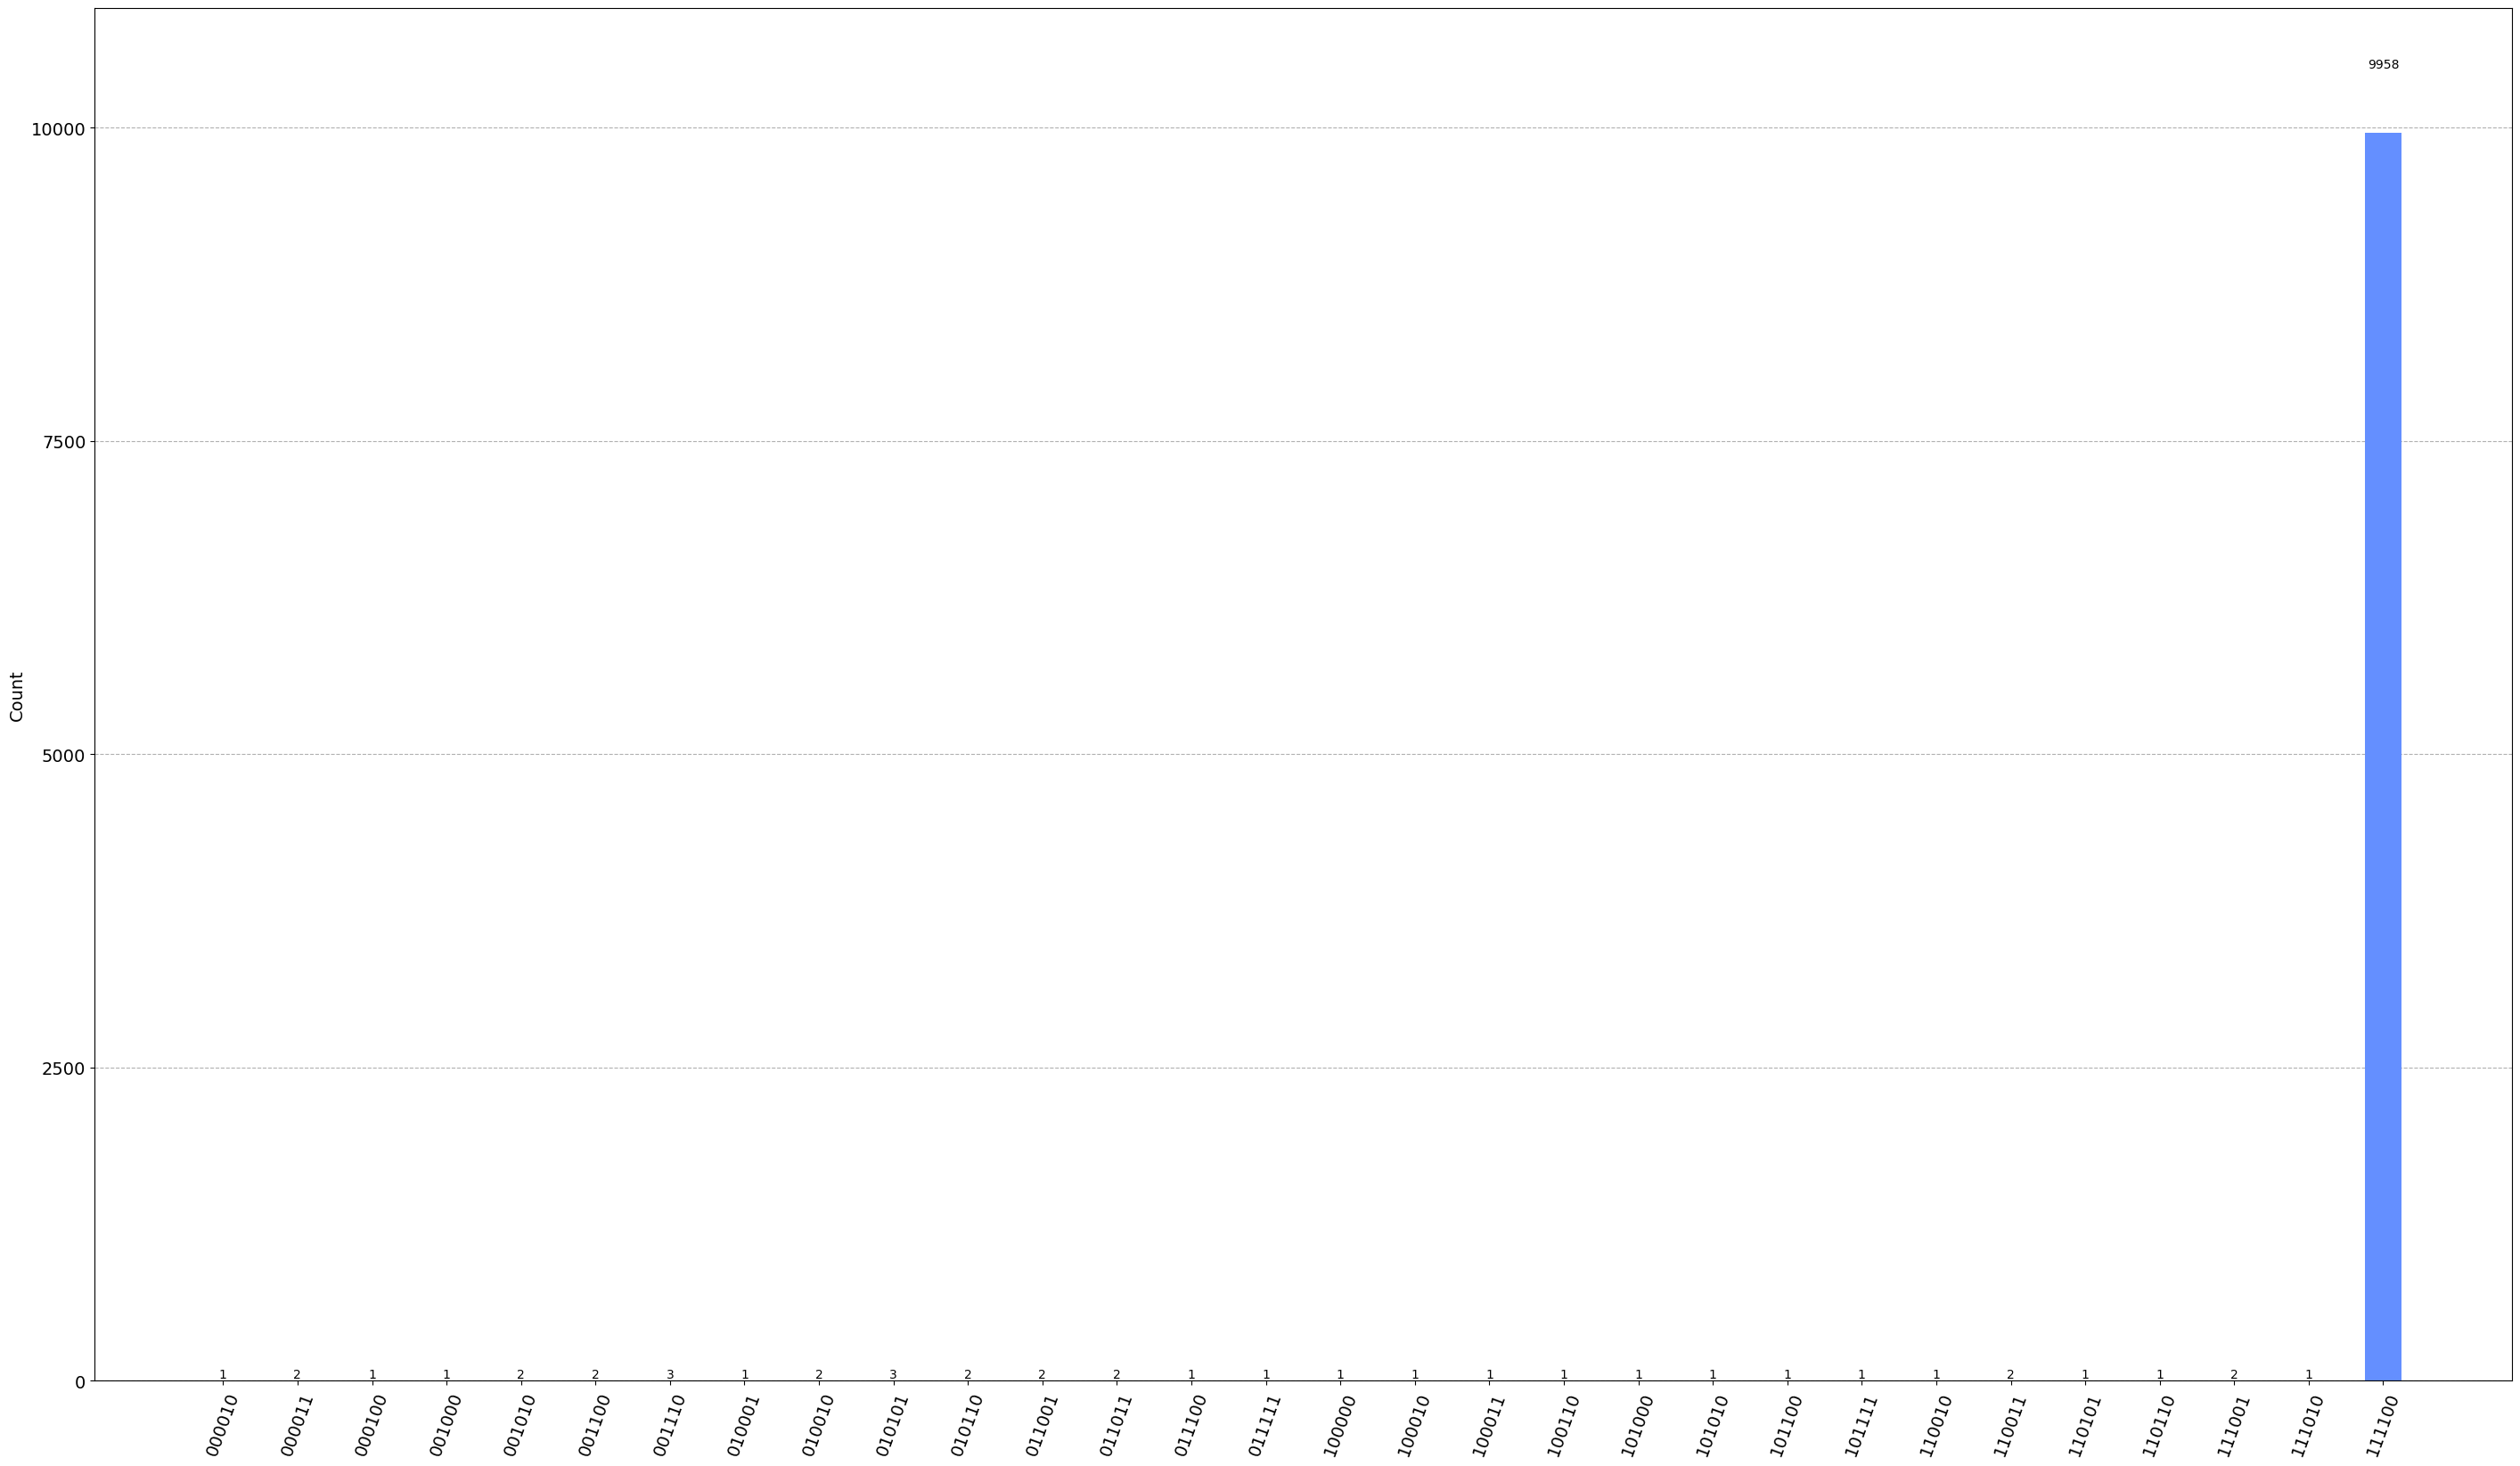

In [296]:
aer_sim = Aer.get_backend('aer_simulator')
# qobj = assemble(circuit)
t_qc = transpile(farm, aer_sim) # sim = simulation
result = aer_sim.run(t_qc,shots=10000).result()
counts = result.get_counts()
plot_histogram(counts,figsize = (35,20))

## CNOT Oracle Function

In [276]:
def EyeofHorusC(qubits,state):
    iterations = math.floor(np.pi/4 * np.sqrt(2**(qubits)))
    non_anscilla = [p for p in range(qubits)]
    counter = 0
    x_sequence = []

    for i in state:
        if int(i) == 0:
            x_sequence.append(counter)
        counter=counter+1

    Q = QuantumRegister(qubits+1)
    C = ClassicalRegister(qubits)

    circuit = QuantumCircuit(Q,C)
    Amp_X = MCMT('cx',qubits,1)
    Amp_Z = MCMT('cz',qubits-1,1)
    circuit.x(qubits) #For the X initialization of the anscilla
    circuit.h(Q)
    for i in range(iterations):
        circuit.barrier()
        circuit.x(x_sequence)
        circuit.append(Amp_X,Q)
        circuit.x(x_sequence)

        circuit.barrier()

        circuit.h(Q)
        circuit.x([p for p in range(qubits)])

        circuit.append(Amp_Z,non_anscilla)
    #     circuit.append(Amp_Final,[0,1,2,4])
        circuit.x(non_anscilla)
        circuit.h(non_anscilla)

    circuit.barrier()
    circuit.x(x_sequence)
    circuit.append(Amp_X,Q)
    circuit.x(x_sequence)

    circuit.barrier()

    circuit.h(non_anscilla)
#     circuit.h(qubits)

    circuit.x(non_anscilla)


    circuit.append(Amp_Z,non_anscilla)
    #     circuit.append(Amp_Final,[0,1,2,4])
    circuit.x(non_anscilla)
    circuit.h(non_anscilla)

    circuit.barrier()
    circuit.measure(non_anscilla,C)
    T = circuit.decompose().decompose().depth()
    return circuit

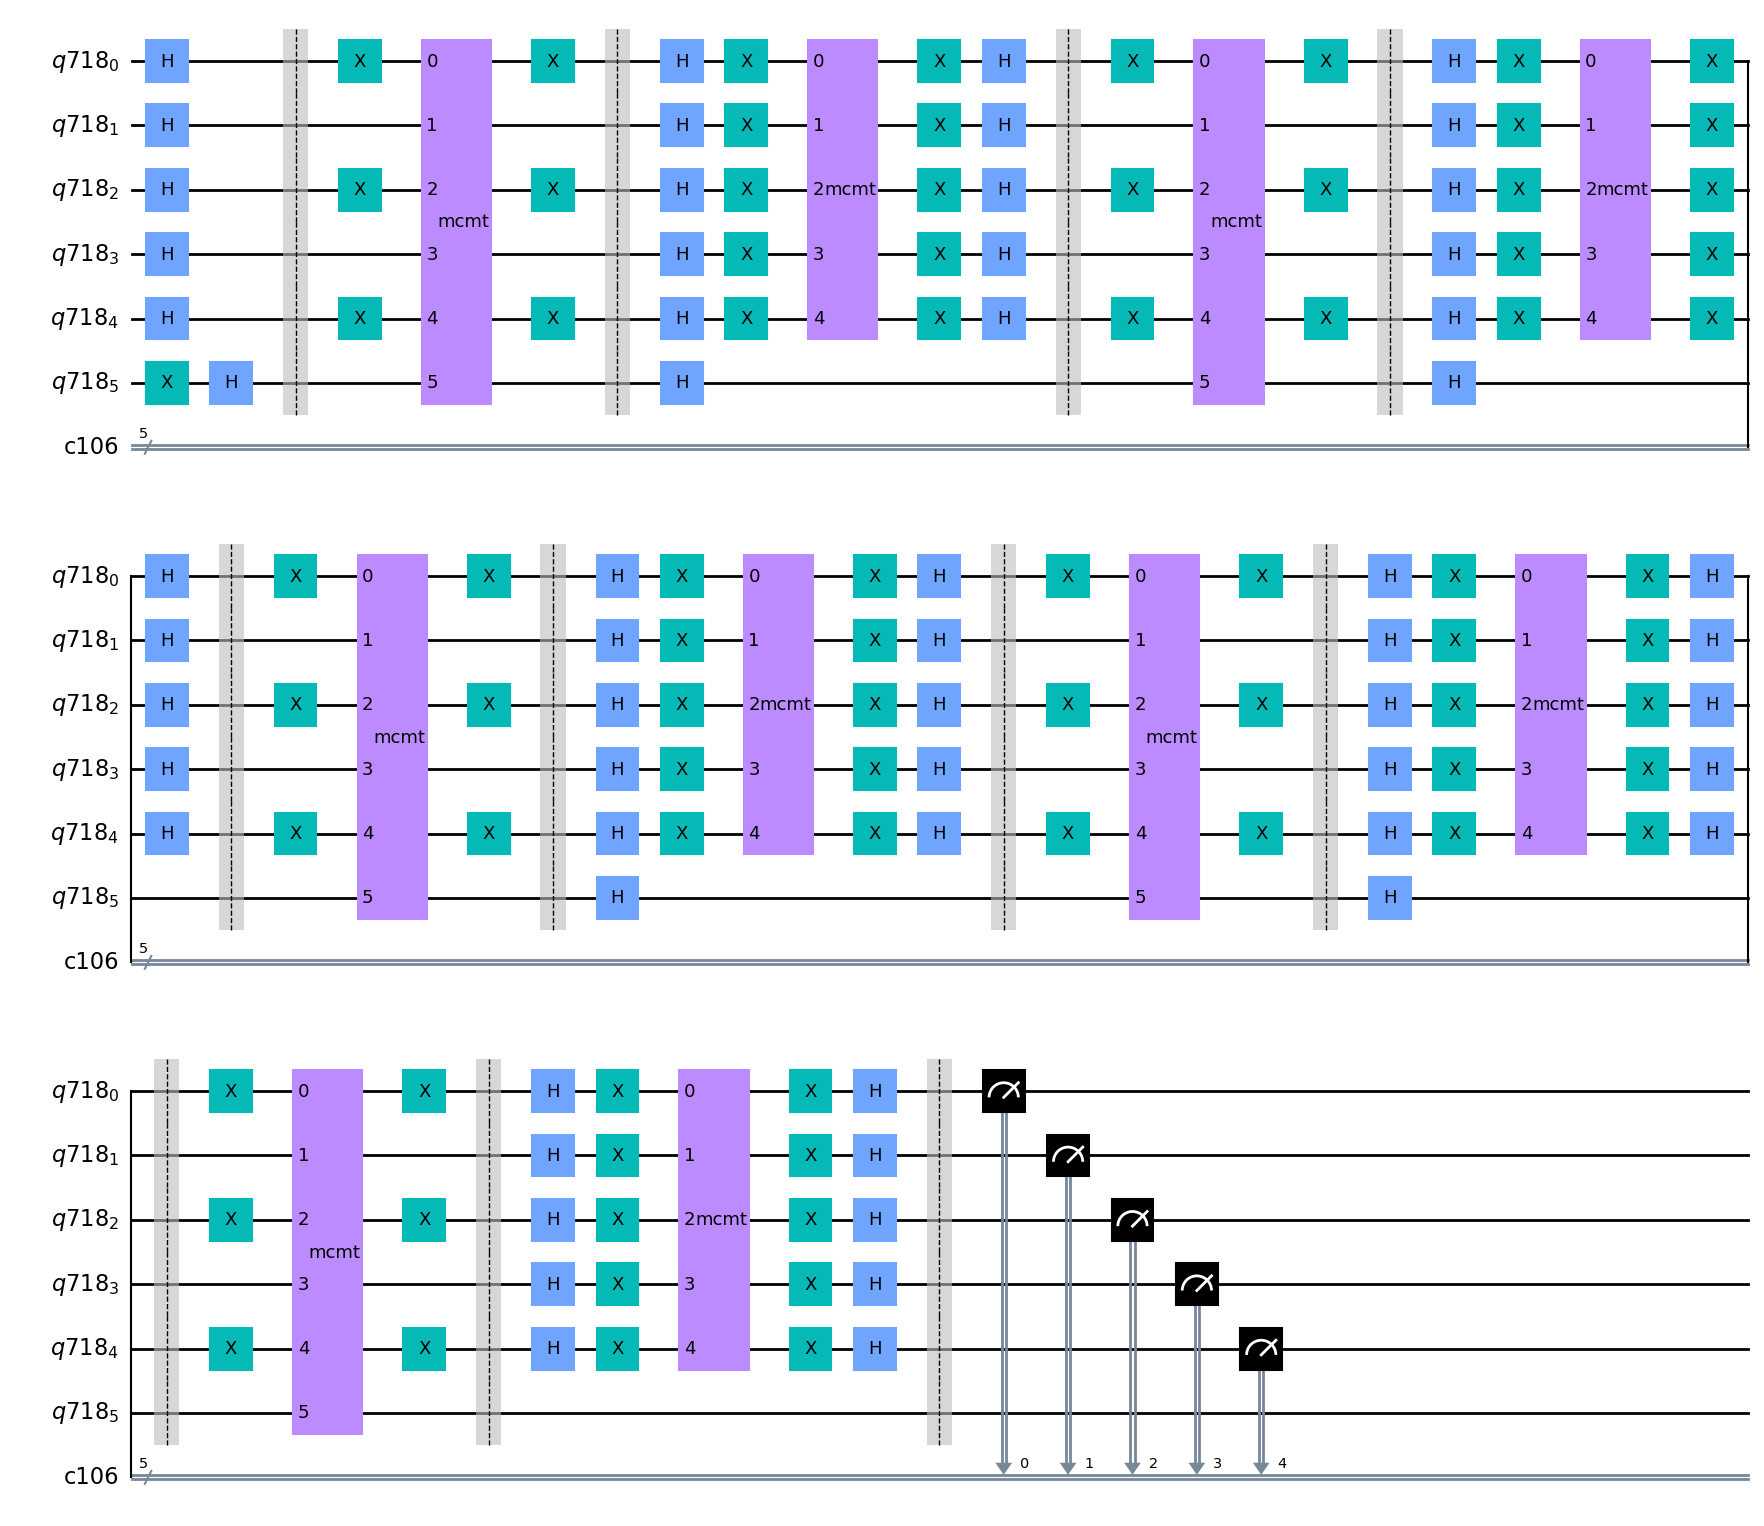

In [277]:
circuit = EyeofHorusC(5,'01010')
circuit.draw('mpl')

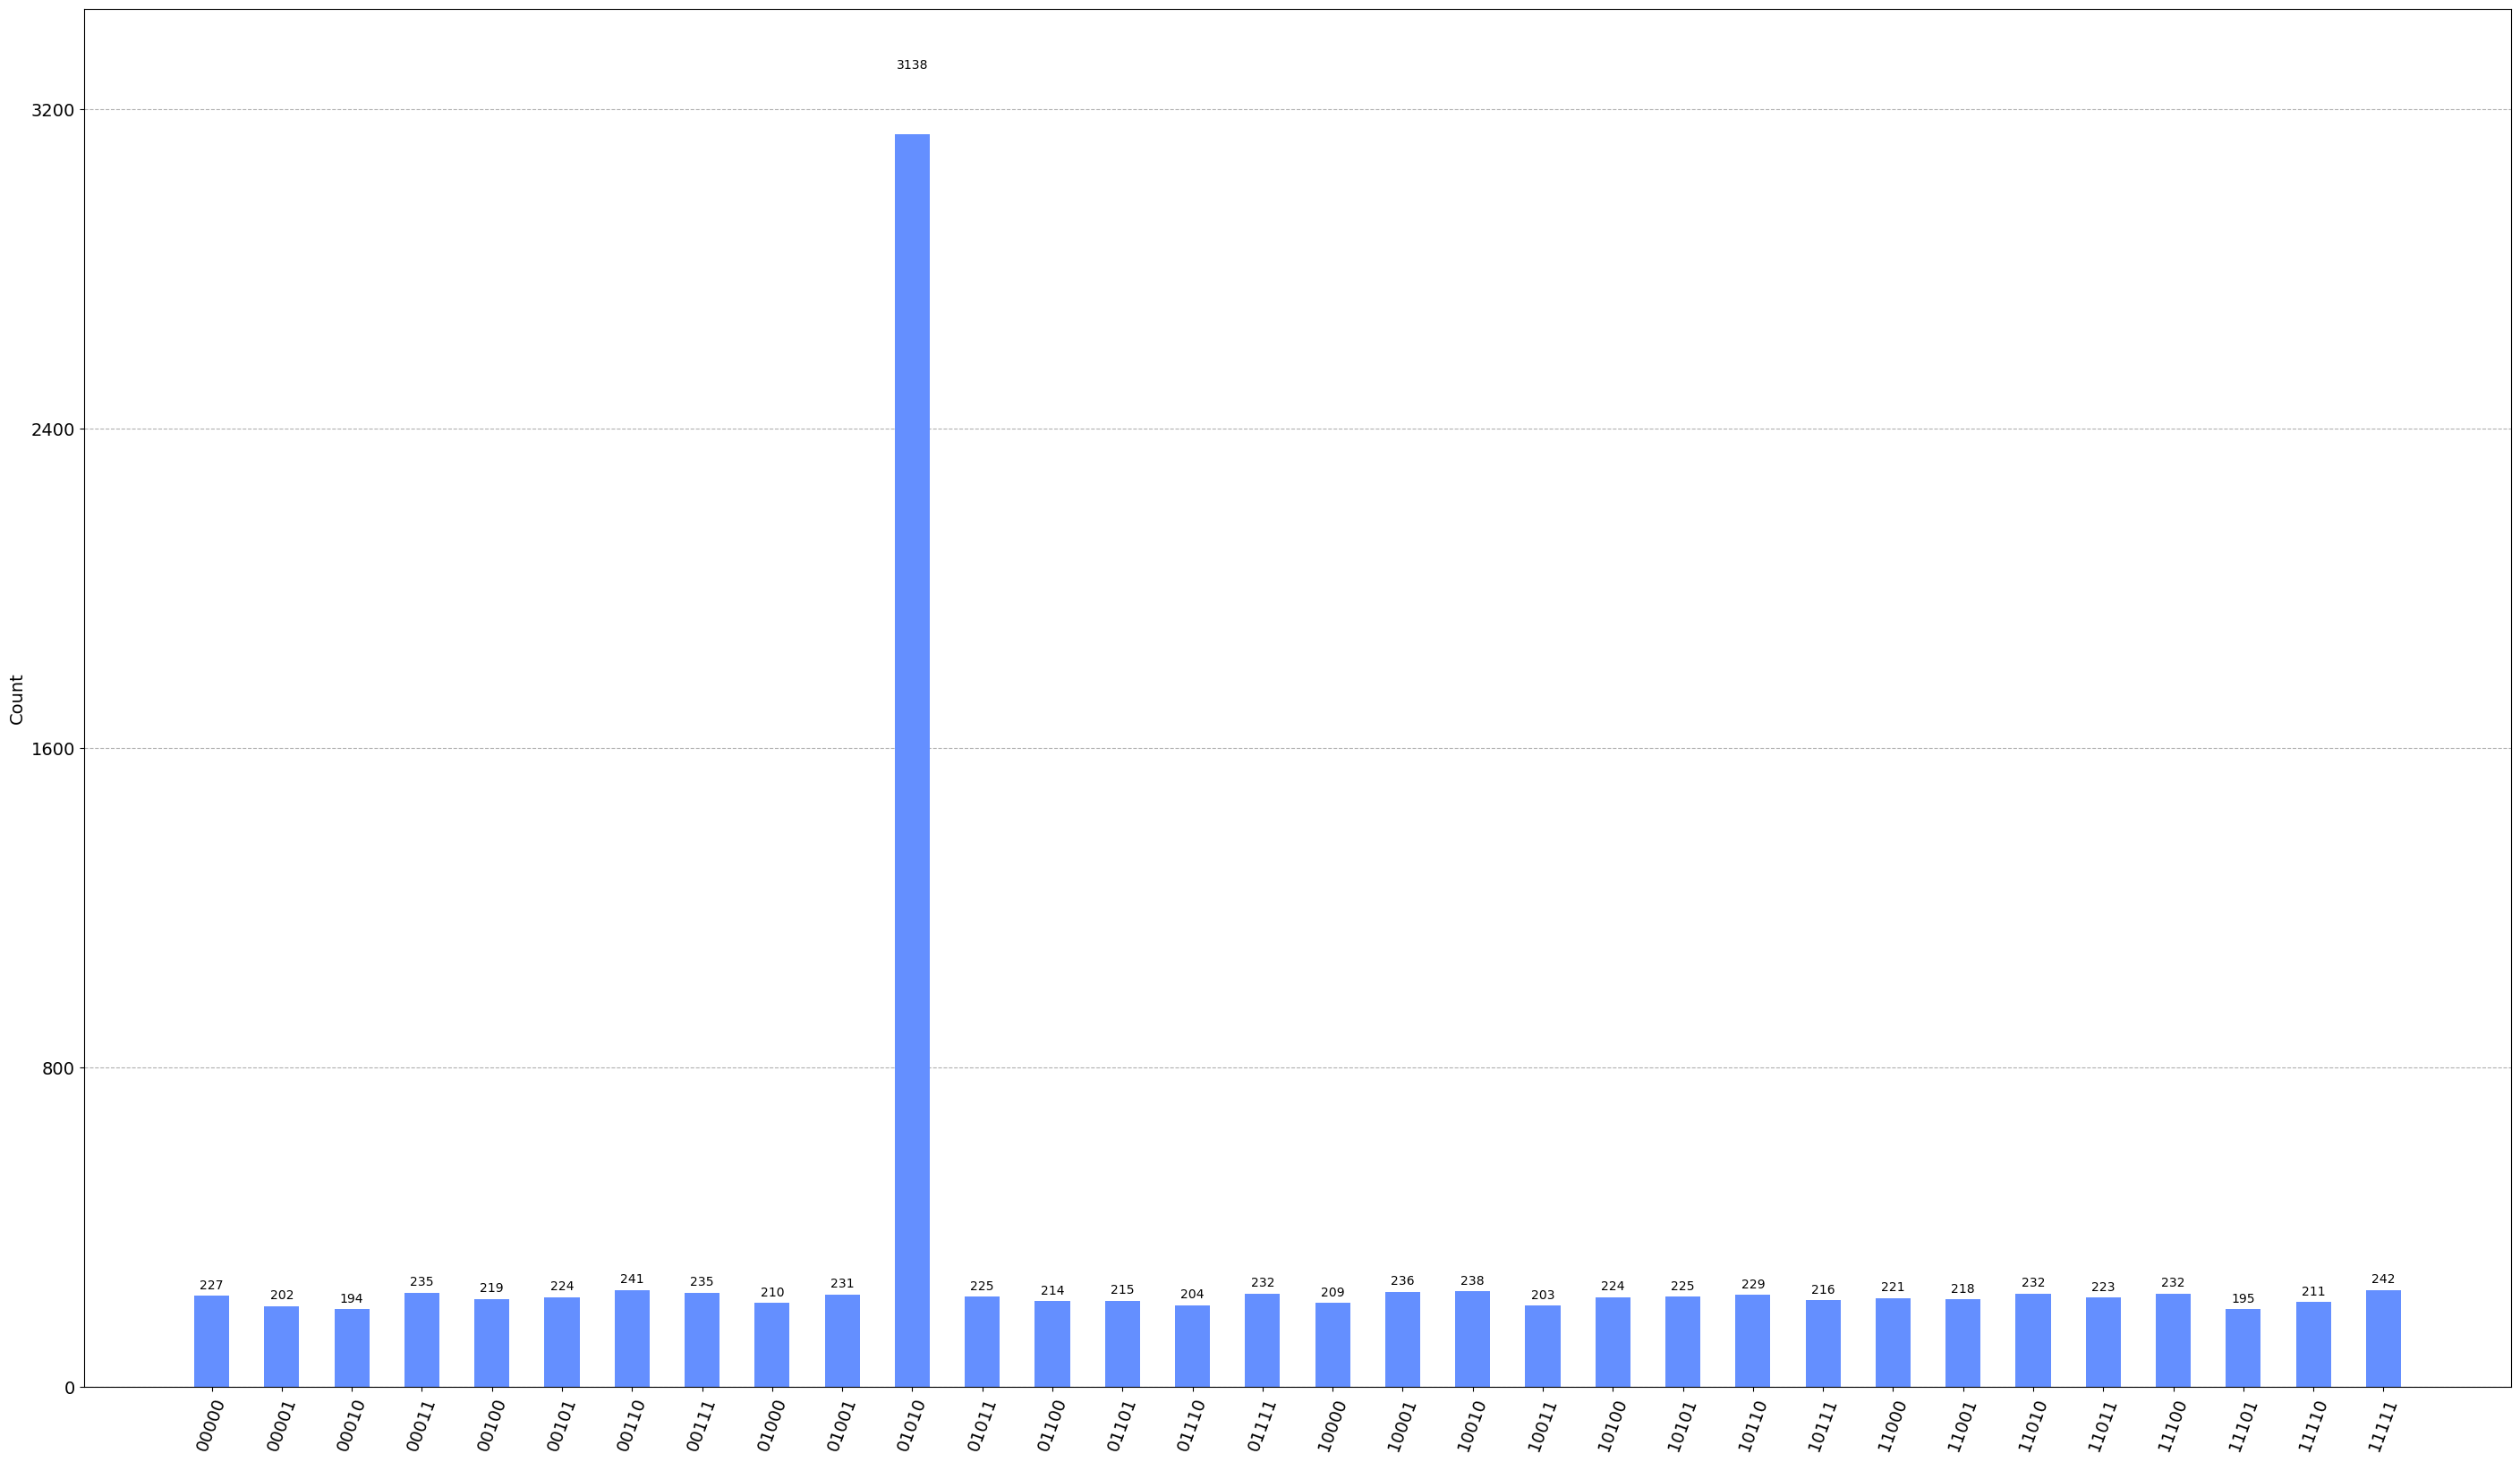

In [278]:
aer_sim = Aer.get_backend('aer_simulator')
# qobj = assemble(circuit)
t_qc = transpile(circuit, aer_sim) # sim = simulation
result = aer_sim.run(t_qc,shots=10000).result()
counts = result.get_counts()
plot_histogram(counts,figsize = (35,20))

In [38]:
#Used to iterate through many n-circuits 
# Real_CNOT_Depth = []
# for r in range(2,11):
#     Real_CNOT_Depth.append(EyeofHorusC(r,'0'+'1' * (r-1)))

In [39]:
Real_CNOT_Depth = [22, 44, 124, 324, 964, 2564, 7684, 21764, 64004]

[22, 44, 124, 324, 964, 2564, 7684, 21764, 64004]

## Circuit Depth

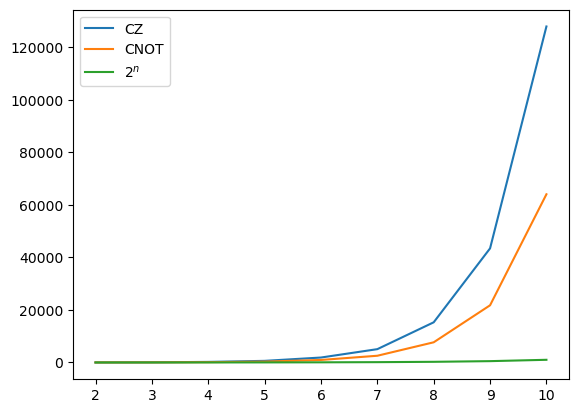

In [45]:
plt.plot([r for r in range(2,11)], Depth_CZ, label='CZ')
plt.plot([r for r in range(2,11)], Real_CNOT_Depth, label='CNOT')
plt.plot([r for r in range(2,11)],[2**r for r in range(2,11)],label='$2^n$')

plt.legend()

In [9]:
Trial_X = MCMT('cx',7,1)
Trial_X.decompose().decompose().decompose().depth()

255

In [8]:
Trial_Z = MCMT('cz',7,1)
Trial_Z.decompose().decompose().decompose().depth()

635

In [294]:
(np.pi/4) * np.sqrt(2**6)

6.283185307179586

## Circuits for Paper

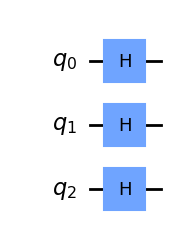

In [108]:
q = QuantumRegister(3,"q")
# c = ClassicalRegister(2,"c")
qc = QuantumCircuit(q)

qc.h(q)
qc.draw('mpl')